**Objective:** Identify which counties and cities in Washington state have the highest and lowest numbers of electric vehicles (EVs).

**Goal:** To understand regional adoption trends and identify areas that may benefit from additional support or incentives to encourage higher adoption of EVs.


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#to display plots inline
%matplotlib inline

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Access your dataset
data_path = '/content/gdrive/My Drive/Colab Notebooks/Electiric vehical/cleaned_data.csv'

In [ ]:
df = pd.read_csv(data_path)
# Display the first few rows of the DataFrame
df.head()

VIN (1-10)     County          City State  Postal Code  Model Year    Make  \
0  5YJSA1E28K  Snohomish      Mukilteo    WA      98275.0        2019   TESLA   
1  1C4JJXP68P     Yakima        Yakima    WA      98901.0        2023    JEEP   
2  WBY8P6C05L     Kitsap      Kingston    WA      98346.0        2020     BMW   
3  JTDKARFP1J     Kitsap  Port Orchard    WA      98367.0        2018  TOYOTA   
4  5UXTA6C09N  Snohomish       Everett    WA      98208.0        2022     BMW   

         Model                   Electric Vehicle Type  \
0      MODEL S          Battery Electric Vehicle (BEV)   
1     WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
2           I3          Battery Electric Vehicle (BEV)   
3  PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4           X5  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             270   
1             Not eligible due to low battery range              21   
2           Clean Alternative Fuel Vehicle Eligible             153   
3             Not eligible due to low battery range              25   
4           Clean Alternative Fuel Vehicle Eligible              30   

   Base MSRP  DOL Vehicle ID                 Vehicle Location  \
0          0       236424583     POINT (-122.29943 47.912654)   
1          0       249905295  POINT (-120.4688751 46.6046178)   
2          0       260917289  POINT (-122.5178351 47.7981436)   
3          0       186410087  POINT (-122.6530052 47.4739066)   
4          0       186076915  POINT (-122.2032349 47.8956271)   

         Electric Utility  2020 Census Tract  
0  PUGET SOUND ENERGY INC       5.306104e+10  
1              PACIFICORP       5.307700e+10  
2  PUGET SOUND ENERGY INC       5.303509e+10  
3  PUGET SOUND ENERGY INC       5.303509e+10  
4  PUGET SOUND ENERGY INC       5.306104e+10

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200040 entries, 0 to 200039
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         200040 non-null  object 
 1   County                                             200040 non-null  object 
 2   City                                               200040 non-null  object 
 3   State                                              200040 non-null  object 
 4   Postal Code                                        200040 non-null  float64
 5   Model Year                                         200040 non-null  int64  
 6   Make                                               200040 non-null  object 
 7   Model                                              200040 non-null  object 
 8   Electric Vehicle Type                              200040 non-null  object

In [ ]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  200040.000000  200040.000000   200040.000000  200040.000000   
mean    98176.168966    2020.871336       53.464812     784.137822   
std      2424.231184       2.994938       88.726489    6133.558906   
min      1731.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98125.000000    2022.000000        0.000000       0.000000   
75%     98372.000000    2023.000000       53.000000       0.000000   
max     99577.000000    2025.000000      322.000000   52900.000000   

       DOL Vehicle ID  2020 Census Tract  
count    2.000400e+05       2.000400e+05  
mean     2.262969e+08       5.297545e+10  
std      7.282079e+07       1.605644e+09  
min      4.385000e+03       1.001020e+09  
25%      1.904573e+08       5.303301e+10  
50%      2.363394e+08       5.303303e+10  
75%      2.609659e+08       5.305307e+10  
max      4.792548e+08       5.602100e+10

In [ ]:
# Check for missing values
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
# Check the data types of each column
df.dtypes


VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                    float64
dtype: object

Count and Compare EV Numbers Across Counties and Cities

In [ ]:
# Count the number of electric vehicles by county
ev_by_county = df.groupby('County').size().reset_index(name='EV Count')

# Count the number of electric vehicles by city
ev_by_city = df.groupby('City').size().reset_index(name='EV Count')

# Display the first few results for both counties and cities
ev_by_county.head()
ev_by_city.head()


City  EV Count
0                 Aberdeen       184
1  Aberdeen Proving Ground         1
2                     Acme        10
3                     Addy         2
4                     Adna         1

Visualize the Distribution of EVs

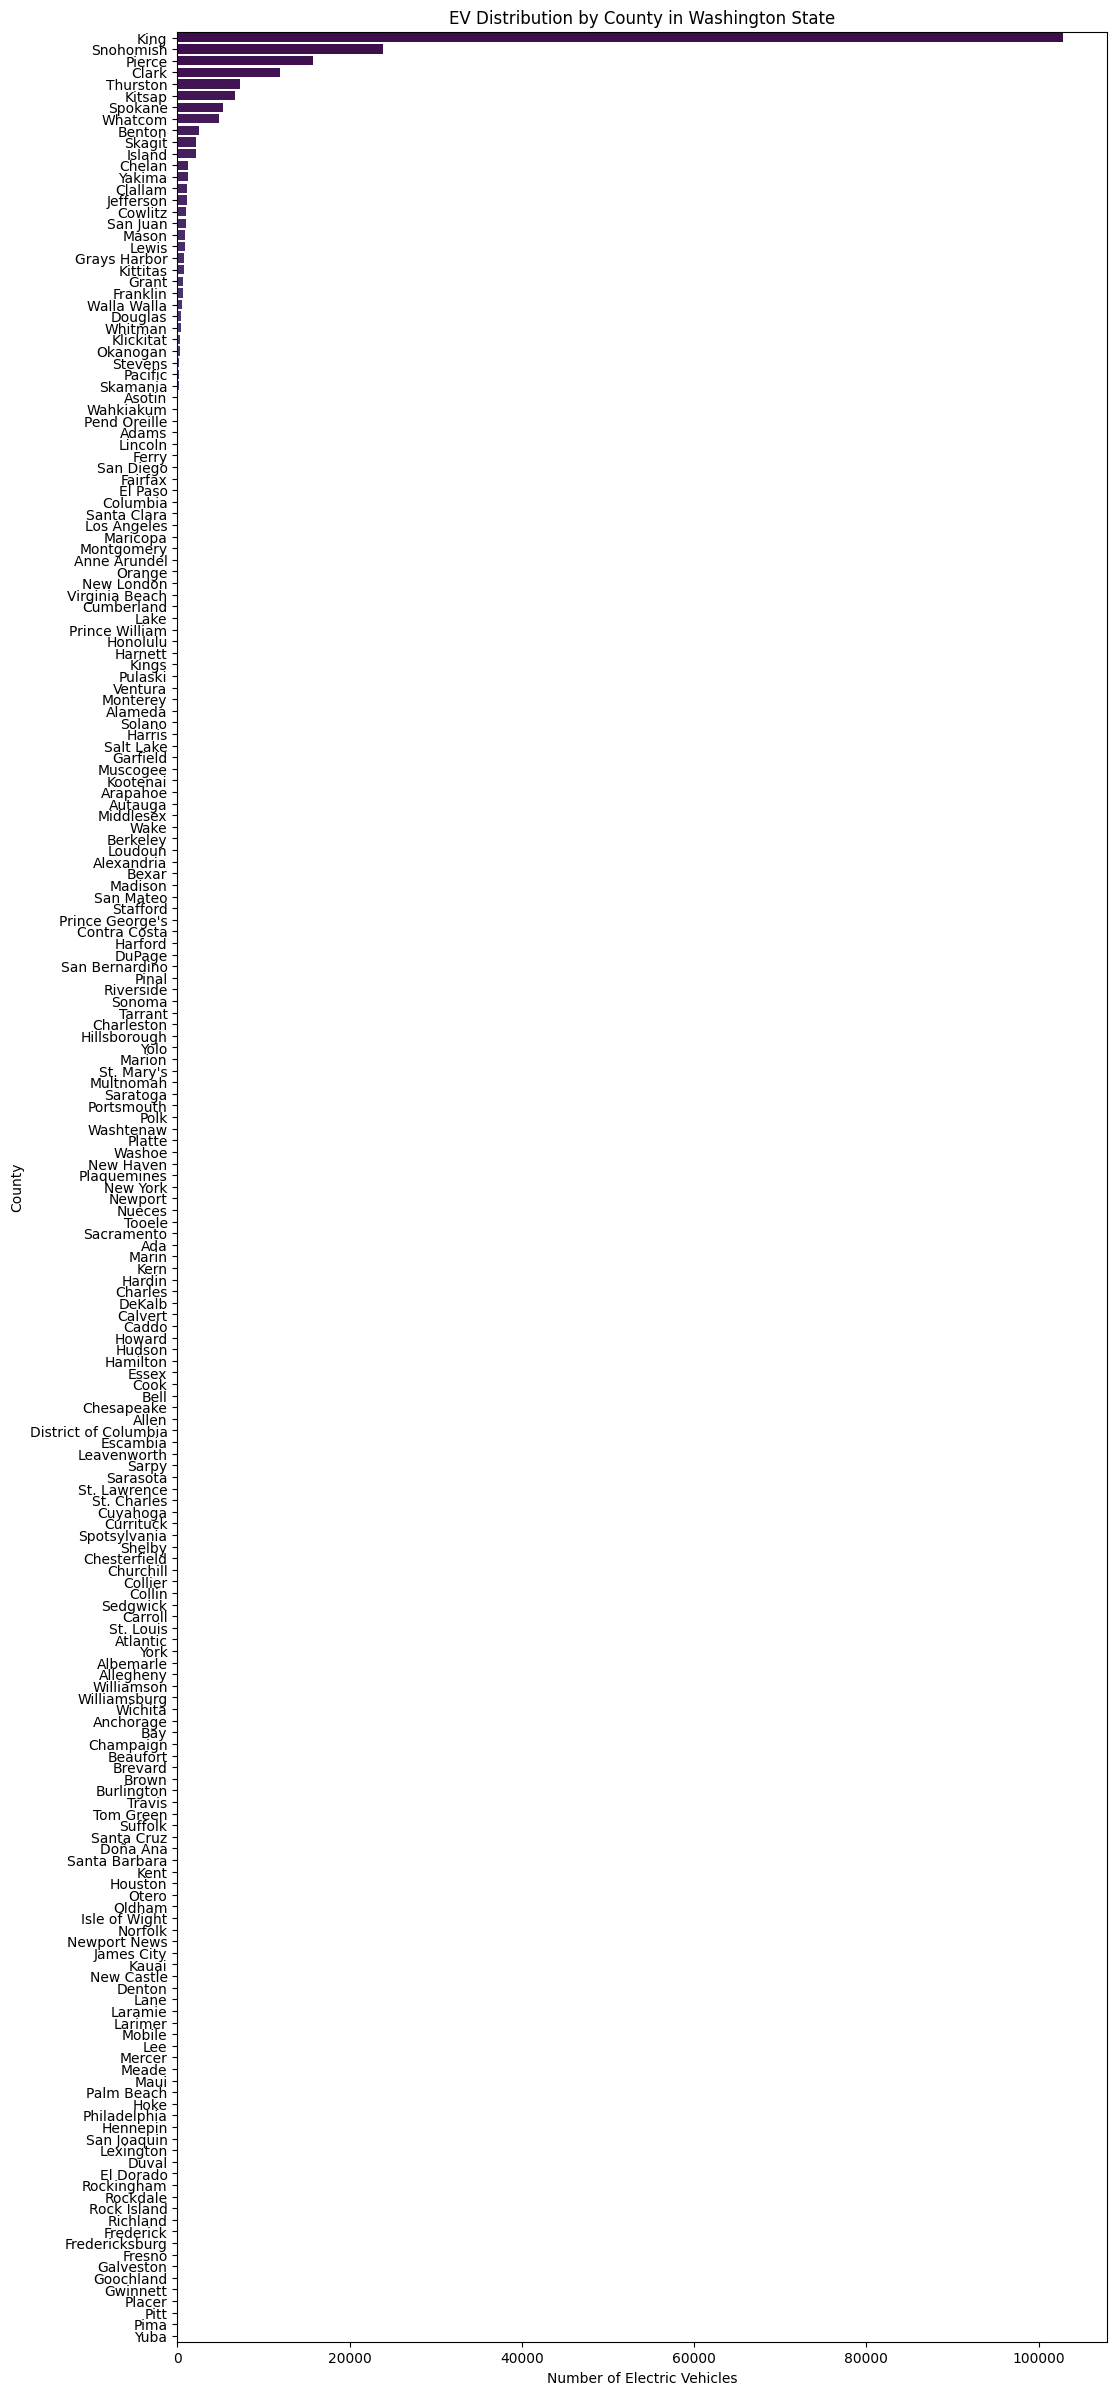

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for counties
plt.figure(figsize=(12, 30))
sns.barplot(x='EV Count', y='County', data=ev_by_county.sort_values(by='EV Count', ascending=False), palette='viridis')
plt.title('EV Distribution by County in Washington State')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()

**Key Findings:**

- King County has the highest number of electric vehicles by a significant margin. This indicates that King County is a major hub for electric vehicle adoption in Washington State.

- The top counties with the most electric vehicles, such as Snohomish, Pierce, and Clark, are primarily urban or suburban areas. This suggests that electric vehicle adoption is higher in more densely populated regions with better infrastructure.

- Many counties, particularly those listed towards the bottom of the chart, show very low numbers of electric vehicles. These are likely rural or less densely populated areas, indicating slower adoption rates in these regions.




EV Distribution by City in Washington State

In [ ]:
# Aggregate the number of electric vehicles by city
ev_by_city = df.groupby('City').size().reset_index(name='EV Count')

# Display the first few rows to verify
ev_by_city.head()


City  EV Count
0                 Aberdeen       184
1  Aberdeen Proving Ground         1
2                     Acme        10
3                     Addy         2
4                     Adna         1

In [ ]:
# Sort the cities by EV Count in descending order
ev_by_city_sorted = ev_by_city.sort_values(by='EV Count', ascending=False)

# Display the sorted cities
ev_by_city_sorted.head(20)  # Displaying the top 20 for quick verification, but the full dataset will be visualized


City  EV Count
605        Seattle     32602
46        Bellevue      9960
550        Redmond      7165
707      Vancouver      7081
61         Bothell      6602
321       Kirkland      5883
553         Renton      5835
585      Sammamish      5795
477        Olympia      4830
666         Tacoma      4204
47      Bellingham      3325
315           Kent      3229
691        Tukwila      3118
373       Lynnwood      3116
644        Spokane      3104
303       Issaquah      3037
207        Everett      2874
753    Woodinville      2595
403  Mercer Island      2543
628      Snohomish      2321

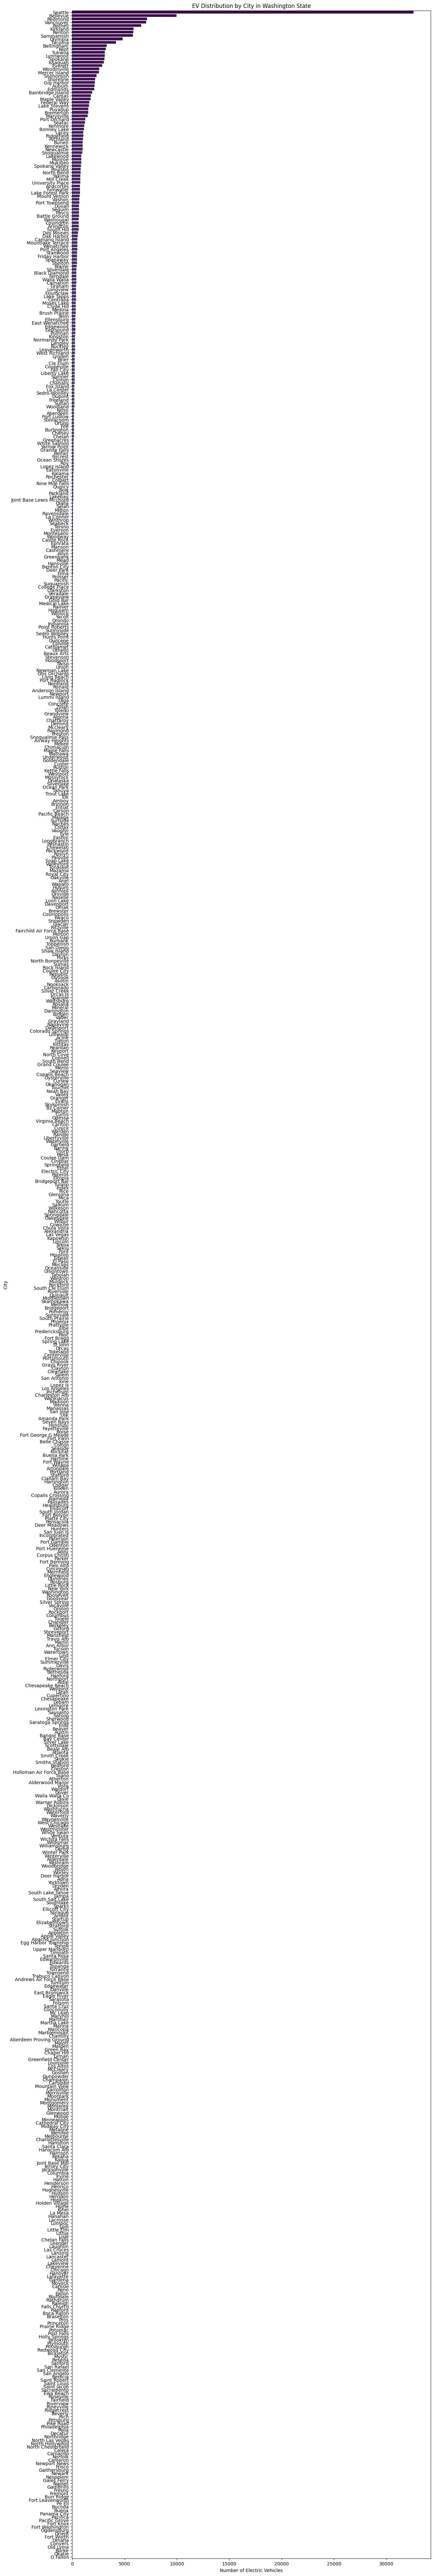

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for all cities
plt.figure(figsize=(14, 100))
sns.barplot(x='EV Count', y='City', data=ev_by_city_sorted, palette='viridis')
plt.title('EV Distribution by City in Washington State')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.show()


**Key Findings**

- Seattle has the highest number of electric vehicles by a significant margin. This suggests that Seattle is the primary hub for electric vehicle adoption in the state.

- The majority of electric vehicles are concentrated in a few major cities, including Bellevue, Redmond, and Kirkland. These cities are known for their tech-driven economies and higher income levels, which could explain the higher adoption rates.

- A large number of cities have very few electric vehicles, highlighting the same skewed distribution seen at the county level. This indicates that electric vehicle adoption is still very limited in many smaller or more rural cities.

- Cities with moderate EV adoption but not as high as the top cities, such as Tacoma and Everett, could be key areas for growth. These cities may benefit from targeted incentives or infrastructure investments to boost adoption rates.

Top 20 Counties by EV Distribution in Washington State

In [ ]:
# Aggregate the number of electric vehicles by county
ev_by_county = df.groupby('County').size().reset_index(name='EV Count')

# Display the first few rows to verify
ev_by_county.head()


County  EV Count
0         Ada         2
1       Adams        62
2     Alameda         5
3   Albemarle         1
4  Alexandria         3

In [ ]:
# Sort the counties by EV Count in descending order and select the top 20
top_20_counties = ev_by_county.sort_values(by='EV Count', ascending=False).head(20)

# Display the top 20 counties
top_20_counties


County  EV Count
85           King    102837
166     Snohomish     23933
132        Pierce     15739
33          Clark     11872
179      Thurston      7297
87         Kitsap      6686
169       Spokane      5261
190       Whatcom      4829
16         Benton      2482
164        Skagit      2171
78         Island      2141
28         Chelan      1207
195        Yakima      1189
32        Clallam      1184
81      Jefferson      1099
39        Cowlitz      1039
154      San Juan      1010
106         Mason       931
97          Lewis       897
64   Grays Harbor       731

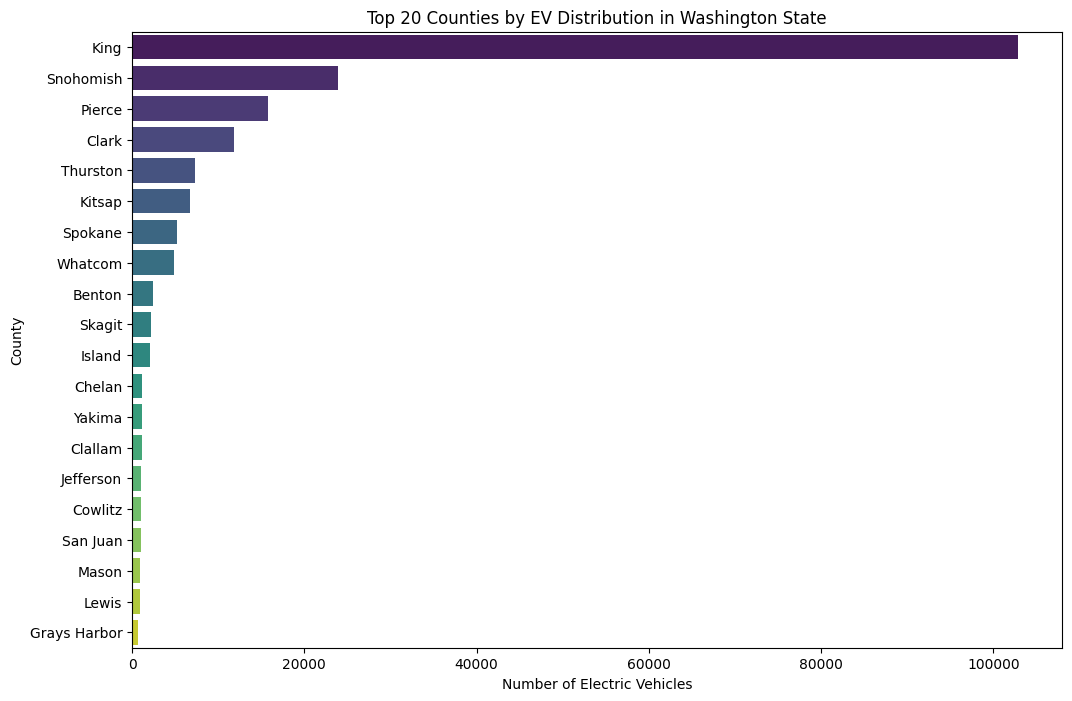

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the top 20 counties
plt.figure(figsize=(12, 8))
sns.barplot(x='EV Count', y='County', data=top_20_counties, palette='viridis')
plt.title('Top 20 Counties by EV Distribution in Washington State')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()


**Key Findings**

- King County has the highest number of electric vehicles, far surpassing other counties.

- Snohomish and Pierce Counties also have a significant number of electric vehicles, but much less compared to King County.

- The distribution drops off quickly after the top few counties, with the remaining counties in the top 20 having relatively fewer electric vehicles.

- This suggests that electric vehicle adoption is heavily concentrated in a few key counties, particularly in urban areas.



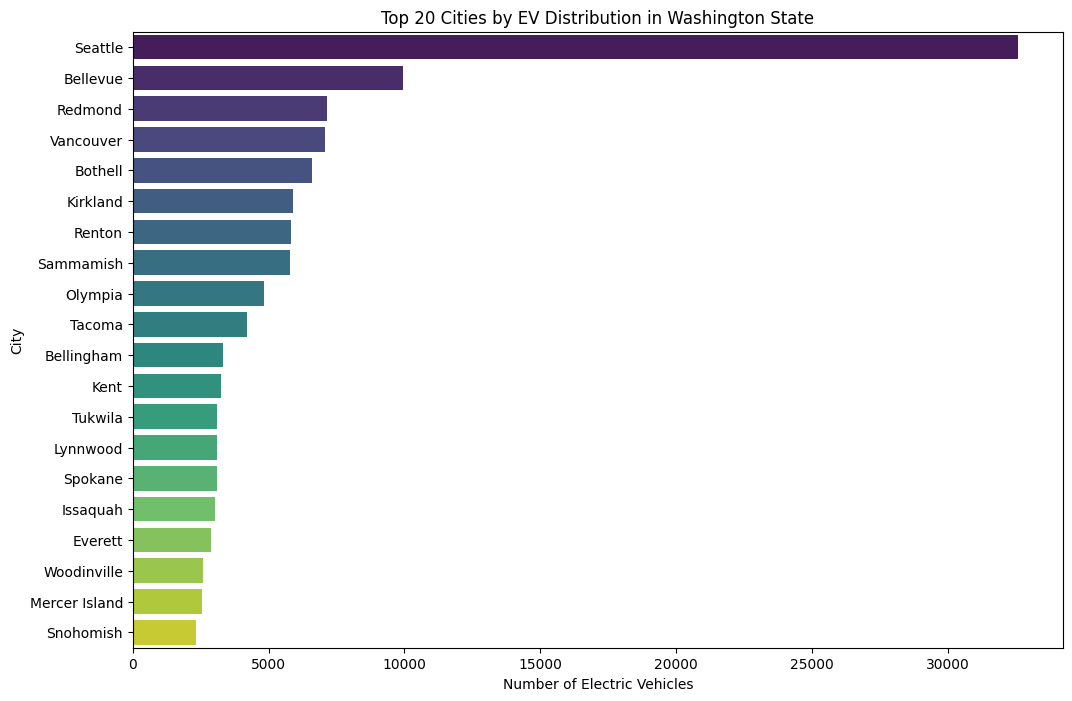

In [ ]:
# Bar plot for cities
plt.figure(figsize=(12, 8))
sns.barplot(x='EV Count', y='City', data=ev_by_city.sort_values(by='EV Count', ascending=False).head(20), palette='viridis')
plt.title('Top 20 Cities by EV Distribution in Washington State')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.show()

**Key Findings**

- Seattle has the highest number of electric vehicles among all cities in Washington State, significantly outpacing other cities.

- Bellevue and Redmond also have high numbers of electric vehicles, reflecting strong adoption in these cities.

- The distribution shows that electric vehicle adoption is concentrated in larger, more affluent cities, with the top cities leading by a considerable margin.

- Smaller cities like Snohomish and Mercer Island are in the top 20 but have noticeably fewer electric vehicles compared to the leading cities.

Understanding the Distribution of Electric Vehicles

1) Vehicle Counts by County

Goal: Identify which counties have the highest and lowest numbers of electric vehicles.

In [ ]:
# Count the number of electric vehicles by county
ev_by_county = df.groupby('County').size().reset_index(name='EV Count')

# Sort by the number of EVs to see the highest and lowest
ev_by_county_sorted = ev_by_county.sort_values(by='EV Count', ascending=False)

# Display the top and bottom counties
print("Top 10 counties with the most EVs:")
print(ev_by_county_sorted.head(10))  # Top 10 counties with the most EVs

print("\nBottom 10 counties with the fewest EVs:")
print(ev_by_county_sorted.tail(10))  # Bottom 10 counties with the fewest EVs

Top 10 counties with the most EVs:
        County  EV Count
85        King    102837
166  Snohomish     23933
132     Pierce     15739
33       Clark     11872
179   Thurston      7297
87      Kitsap      6686
169    Spokane      5261
190    Whatcom      4829
16      Benton      2482
164     Skagit      2171

Bottom 10 counties with the fewest EVs:
             County  EV Count
57        Frederick         1
58   Fredericksburg         1
59           Fresno         1
60        Galveston         1
62        Goochland         1
65         Gwinnett         1
136          Placer         1
135            Pitt         1
133            Pima         1
198            Yuba         1


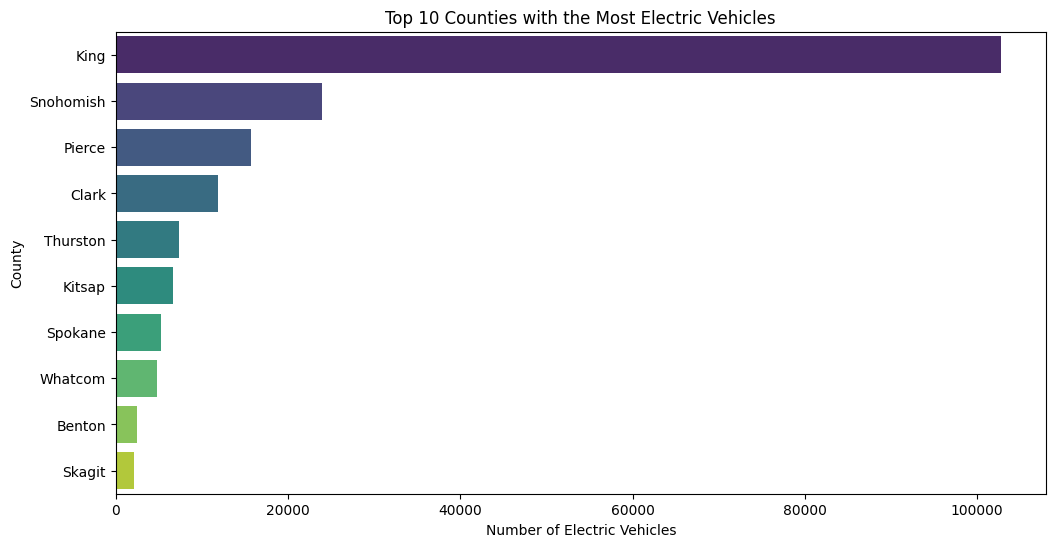

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for the top 10 counties with the most EVs
plt.figure(figsize=(12, 6))
sns.barplot(x='EV Count', y='County', data=ev_by_county_sorted.head(10), palette='viridis')
plt.title('Top 10 Counties with the Most Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()

**Key Findings**

- King County leads by a wide margin with the highest number of electric vehicles, significantly outpacing all other counties.

- Snohomish and Pierce Counties follow but have substantially fewer electric vehicles compared to King County.

- The top 10 counties show a clear concentration of electric vehicles, with urban and suburban areas like Clark, Thurston, and Kitsap Counties also having notable numbers.

- This distribution highlights that electric vehicle adoption is strongest in King County, with other counties showing varying but much lower levels of adoption.

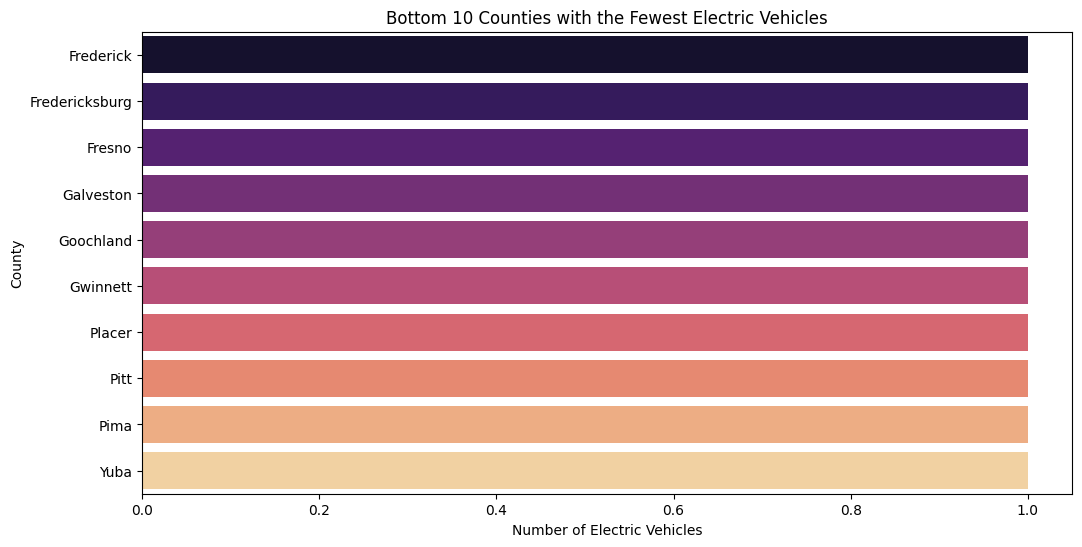

In [ ]:
# Plot for the bottom 10 counties with the fewest EVs
plt.figure(figsize=(12, 6))
sns.barplot(x='EV Count', y='County', data=ev_by_county_sorted.tail(10), palette='magma')
plt.title('Bottom 10 Counties with the Fewest Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()

**Key Findings**

- These bottom 10 counties have the fewest electric vehicles, each with a very low count, nearly identical across the counties.

- This indicates extremely low adoption of electric vehicles in these regions.

- The uniformity in low numbers suggests that these counties might lack the infrastructure, incentives, or awareness needed to drive higher adoption rates.

To identify the top 10 cities with the most electric vehicles (EVs)

In [ ]:
# Aggregate the number of electric vehicles by city
ev_by_city = df.groupby('City').size().reset_index(name='EV Count')

# Sort the cities by EV Count in descending order
ev_by_city_sorted = ev_by_city.sort_values(by='EV Count', ascending=False)

# Display the top 10 cities
top_10_cities = ev_by_city_sorted.head(10)
print("Top 10 Cities with the Most Electric Vehicles:")
print(top_10_cities)

# Display the bottom 10 cities
bottom_10_cities = ev_by_city_sorted.tail(10)
print("\nBottom 10 Cities with the Most Electric Vehicles:")
print(bottom_10_cities)


Top 10 Cities with the Most Electric Vehicles:
          City  EV Count
605    Seattle     32602
46    Bellevue      9960
550    Redmond      7165
707  Vancouver      7081
61     Bothell      6602
321   Kirkland      5883
553     Renton      5835
585  Sammamish      5795
477    Olympia      4830
666     Tacoma      4204

Bottom 10 Cities with the Most Electric Vehicles:
                City  EV Count
230  Fort Washington         1
471       Ogdensburg         1
483           Orient         1
232       Fort Worth         1
478            Omaha         1
139          Conyers         1
475         Old Lyme         1
78             Burke         1
473           Okatie         1
462         O Fallon         1


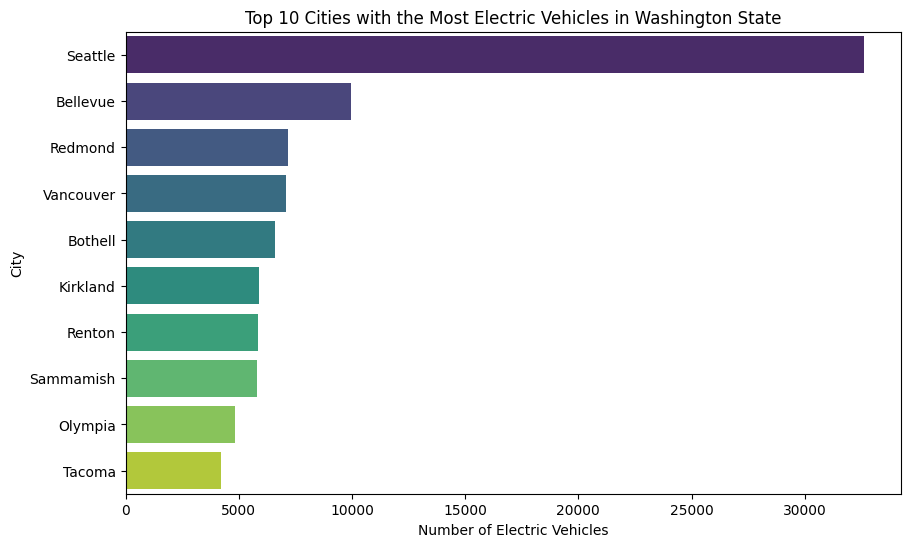

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x='EV Count', y='City', data=top_10_cities, palette='viridis')
plt.title('Top 10 Cities with the Most Electric Vehicles in Washington State')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.show()


**Key Findings**

- Seattle leads by a large margin with the highest number of electric vehicles among all cities in Washington State.

- Bellevue and Redmond also have significant numbers of electric vehicles, but much fewer compared to Seattle.

- Other cities like Vancouver, Bothell, and Kirkland have a moderate number of electric vehicles, showing strong adoption but not as high as the top three.

- This suggests that electric vehicle adoption is highly concentrated in larger, more affluent cities, particularly in the Seattle metro area.

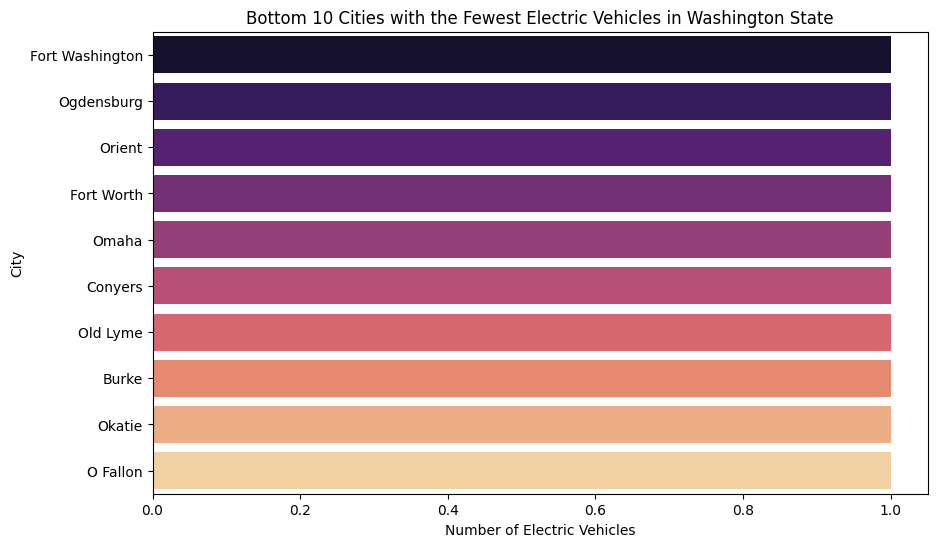

In [ ]:
# Create a bar plot for the bottom 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x='EV Count', y='City', data=bottom_10_cities, palette='magma')
plt.title('Bottom 10 Cities with the Fewest Electric Vehicles in Washington State')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.show()


**Key Findings**

- These bottom 10 cities (Fort Washington, Ogdensburg, orient, Fort Worth, Omaha etc.,) have the fewest electric vehicles, with very similar and extremely low counts.

- This indicates that electric vehicle adoption is nearly nonexistent in these cities.

- The uniformity in low numbers suggests that these cities might face common barriers to adoption, such as limited infrastructure, lack of incentives, or lower public awareness.

Analyzing EV Types and Their Distribution

Distribution by Vehicle Type (BEV vs. PHEV)

Goal: Understand consumer preferences for different types of electric vehicles.

Count and Compare EV Types by Counties and Cities

**Count EV Types by County**

In [ ]:
# Count the number of BEVs and PHEVs by county
ev_type_by_county = df.groupby(['County', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Pivot the data for better visualization (by county)
ev_type_pivot_county = ev_type_by_county.pivot(index='County', columns='Electric Vehicle Type', values='Count').fillna(0)

# Display the pivoted table
ev_type_pivot_county.head()


Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
County                                                  
Ada                                               2.0   
Adams                                            41.0   
Alameda                                           4.0   
Albemarle                                         1.0   
Alexandria                                        3.0   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  
County                                                         
Ada                                                       0.0  
Adams                                                    21.0  
Alameda                                                   1.0  
Albemarle                                                 0.0  
Alexandria                                                0.0

**Count EV Types by City**

In [ ]:
# Count the number of BEVs and PHEVs by city
ev_type_by_city = df.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Pivot the data for better visualization (by city)
ev_type_pivot_city = ev_type_by_city.pivot(index='City', columns='Electric Vehicle Type', values='Count').fillna(0)

# Display the pivoted table
ev_type_pivot_city.head()


Electric Vehicle Type    Battery Electric Vehicle (BEV)  \
City                                                      
Aberdeen                                          124.0   
Aberdeen Proving Ground                             1.0   
Acme                                                6.0   
Addy                                                2.0   
Adna                                                1.0   

Electric Vehicle Type    Plug-in Hybrid Electric Vehicle (PHEV)  
City                                                             
Aberdeen                                                   60.0  
Aberdeen Proving Ground                                     0.0  
Acme                                                        4.0  
Addy                                                        0.0  
Adna                                                        0.0

**Visualize the Distribution by Counties**

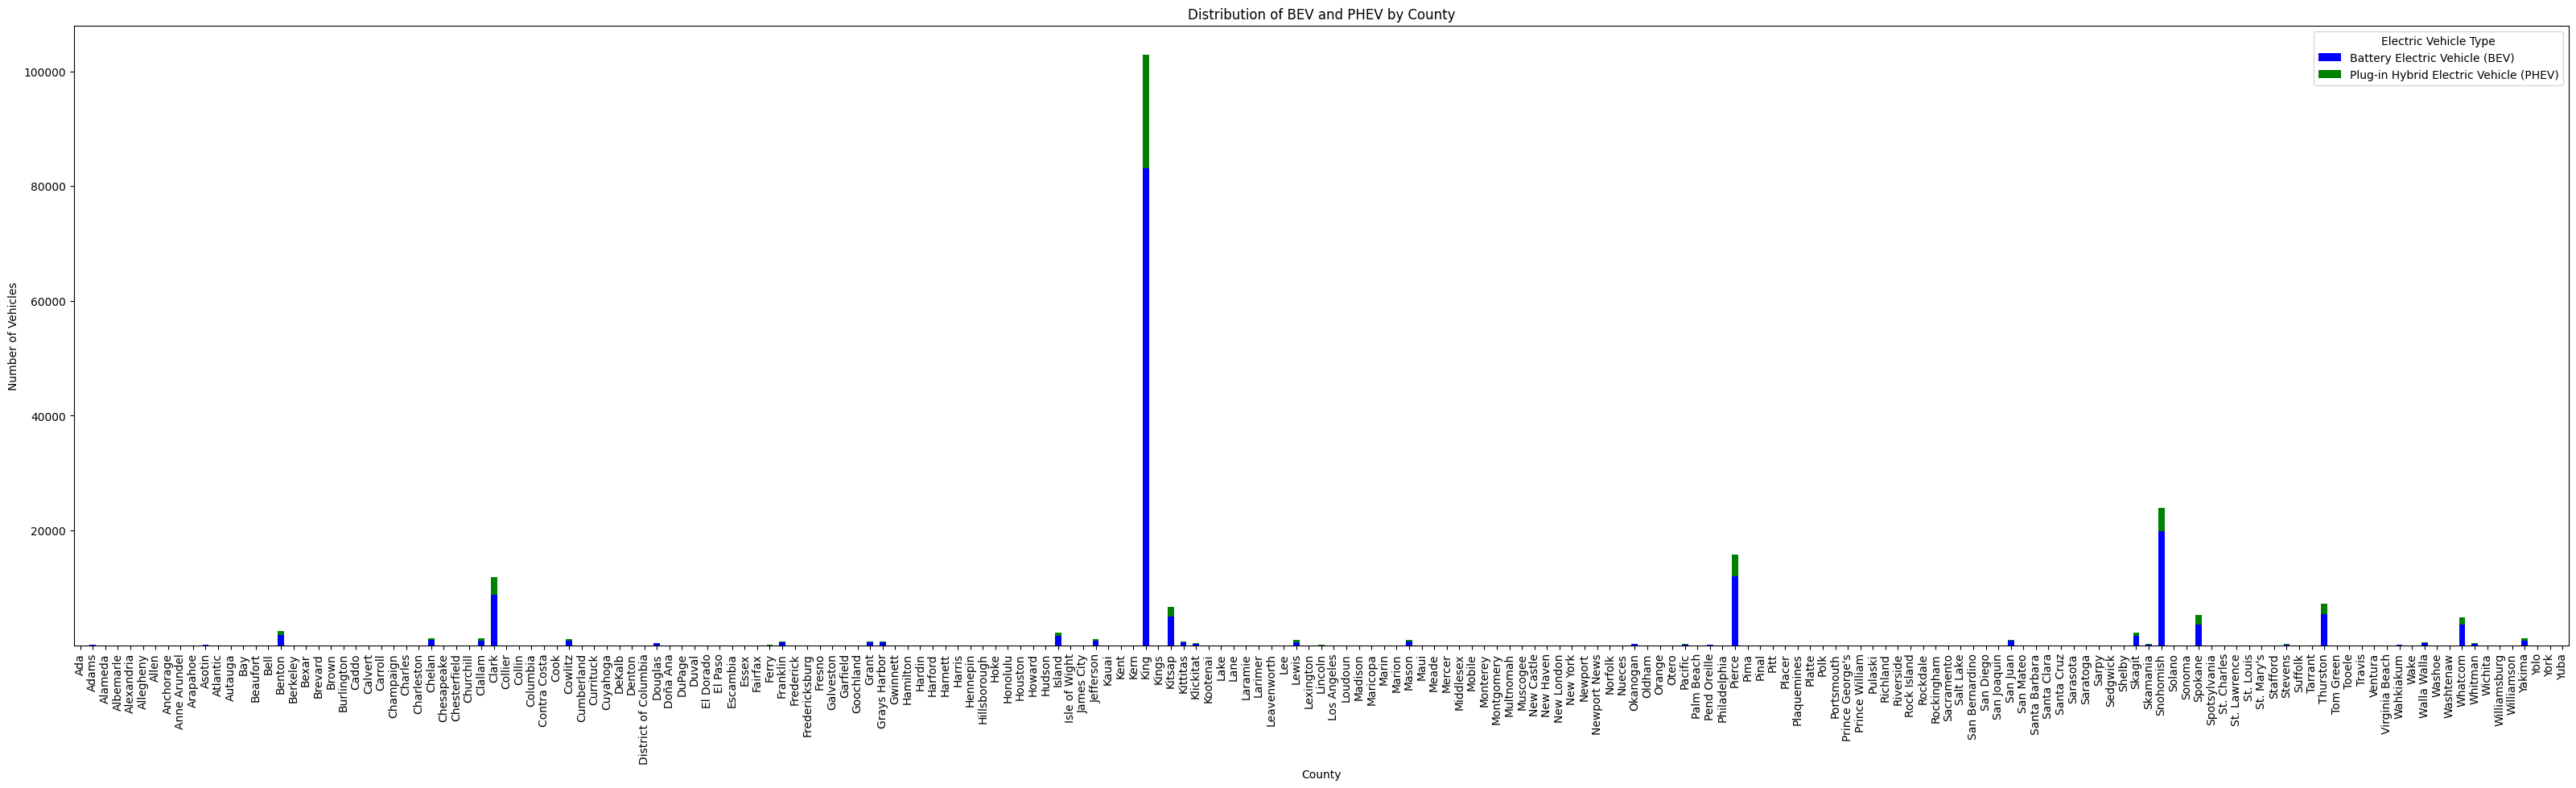

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution by county
ev_type_pivot_county.plot(kind='bar', stacked=True, figsize=(40, 10), color=['blue', 'green'])
plt.title('Distribution of BEV and PHEV by County')
plt.xlabel('County')
plt.ylabel('Number of Vehicles')
plt.legend(title='Electric Vehicle Type')
plt.show()


**Key Findings**

- Battery Electric Vehicles (BEVs) are overwhelmingly more common than Plug-in Hybrid Electric Vehicles (PHEVs) across most counties.

- King County has the highest number of both BEVs and PHEVs, with BEVs dominating the market.

- A few other counties, such as Snohomish and Pierce, show moderate numbers of BEVs and PHEVs, but still far fewer than King County.

- Most other counties have very low numbers of both BEVs and PHEVs, indicating that electric vehicle adoption, particularly of PHEVs, is still limited in many regions.

**Visualize the Distribution by Cities**

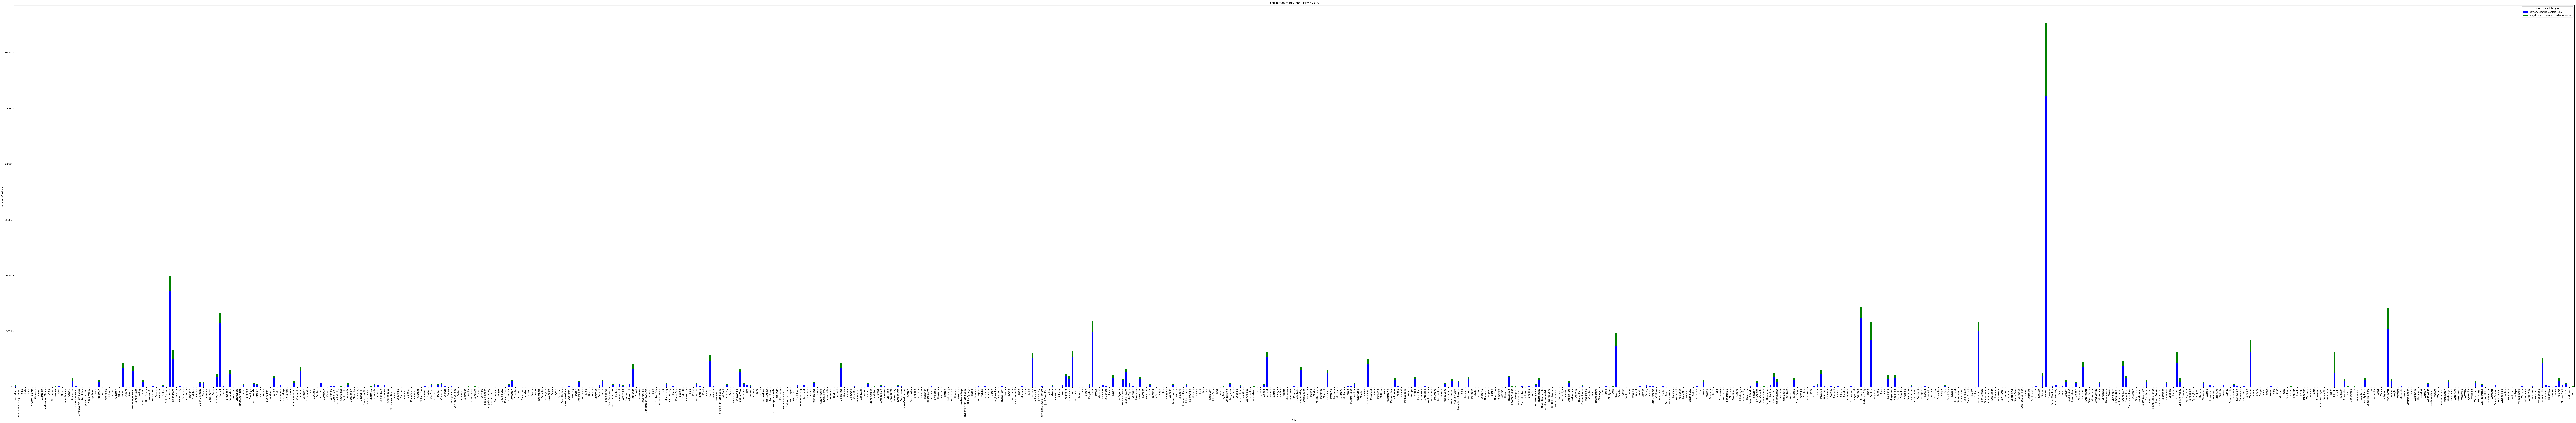

In [ ]:
# Plotting the distribution by city
ev_type_pivot_city.plot(kind='bar', stacked=True, figsize=(200, 30), color=['blue', 'green'])
plt.title('Distribution of BEV and PHEV by City')
plt.xlabel('City')
plt.ylabel('Number of Vehicles')
plt.legend(title='Electric Vehicle Type')
plt.show()


**Key Findings**

- BEVs are more prevalent than PHEVs in the majority of cities.

- A few cities stand out with higher numbers of BEVs and PHEVs, but most cities have relatively low counts.

- This suggests that BEVs are generally more popular than PHEVs across various locations, with some cities showing more significant adoption of electric vehicles than others.

**Percentages of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) by county and city**

**Aggregate by County**

In [ ]:
# Aggregate the number of BEVs and PHEVs by county
ev_type_by_county = df.groupby(['County', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Pivot the data to have BEV and PHEV as separate columns
ev_type_pivot_county = ev_type_by_county.pivot(index='County', columns='Electric Vehicle Type', values='Count').fillna(0)

# Calculate the total number of EVs in each county
ev_type_pivot_county['Total EVs'] = ev_type_pivot_county.sum(axis=1)

# Display the pivoted table
ev_type_pivot_county.head()


Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
County                                                  
Ada                                               2.0   
Adams                                            41.0   
Alameda                                           4.0   
Albemarle                                         1.0   
Alexandria                                        3.0   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  Total EVs  
County                                                                    
Ada                                                       0.0        2.0  
Adams                                                    21.0       62.0  
Alameda                                                   1.0        5.0  
Albemarle                                                 0.0        1.0  
Alexandria                                                0.0        3.0

**Aggregate by City**

In [ ]:
# Aggregate the number of BEVs and PHEVs by city
ev_type_by_city = df.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Pivot the data to have BEV and PHEV as separate columns
ev_type_pivot_city = ev_type_by_city.pivot(index='City', columns='Electric Vehicle Type', values='Count').fillna(0)

# Calculate the total number of EVs in each city
ev_type_pivot_city['Total EVs'] = ev_type_pivot_city.sum(axis=1)

# Display the pivoted table
ev_type_pivot_city.head()


Electric Vehicle Type    Battery Electric Vehicle (BEV)  \
City                                                      
Aberdeen                                          124.0   
Aberdeen Proving Ground                             1.0   
Acme                                                6.0   
Addy                                                2.0   
Adna                                                1.0   

Electric Vehicle Type    Plug-in Hybrid Electric Vehicle (PHEV)  Total EVs  
City                                                                        
Aberdeen                                                   60.0      184.0  
Aberdeen Proving Ground                                     0.0        1.0  
Acme                                                        4.0       10.0  
Addy                                                        0.0        2.0  
Adna                                                        0.0        1.0

**Calculate Percentages by County**

In [ ]:
# Calculate the percentage of BEVs and PHEVs by county
ev_type_pivot_county['BEV Percentage'] = (ev_type_pivot_county['Battery Electric Vehicle (BEV)'] / ev_type_pivot_county['Total EVs']) * 100
ev_type_pivot_county['PHEV Percentage'] = (ev_type_pivot_county['Plug-in Hybrid Electric Vehicle (PHEV)'] / ev_type_pivot_county['Total EVs']) * 100

# Display the results
ev_type_pivot_county[['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'BEV Percentage', 'PHEV Percentage']].head()


Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
County                                                  
Ada                                               2.0   
Adams                                            41.0   
Alameda                                           4.0   
Albemarle                                         1.0   
Alexandria                                        3.0   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  BEV Percentage  \
County                                                                          
Ada                                                       0.0      100.000000   
Adams                                                    21.0       66.129032   
Alameda                                                   1.0       80.000000   
Albemarle                                                 0.0      100.000000   
Alexandria                                                0.0      100.000000   

Electric Vehicle Type  PHEV Percentage  
County                                  
Ada                           0.000000  
Adams                        33.870968  
Alameda                      20.000000  
Albemarle                     0.000000  
Alexandria                    0.000000

**Calculate Percentages by City**

In [ ]:
# Calculate the percentage of BEVs and PHEVs by city
ev_type_pivot_city['BEV Percentage'] = (ev_type_pivot_city['Battery Electric Vehicle (BEV)'] / ev_type_pivot_city['Total EVs']) * 100
ev_type_pivot_city['PHEV Percentage'] = (ev_type_pivot_city['Plug-in Hybrid Electric Vehicle (PHEV)'] / ev_type_pivot_city['Total EVs']) * 100

# Display the results
ev_type_pivot_city[['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)', 'BEV Percentage', 'PHEV Percentage']].head()


Electric Vehicle Type    Battery Electric Vehicle (BEV)  \
City                                                      
Aberdeen                                          124.0   
Aberdeen Proving Ground                             1.0   
Acme                                                6.0   
Addy                                                2.0   
Adna                                                1.0   

Electric Vehicle Type    Plug-in Hybrid Electric Vehicle (PHEV)  \
City                                                              
Aberdeen                                                   60.0   
Aberdeen Proving Ground                                     0.0   
Acme                                                        4.0   
Addy                                                        0.0   
Adna                                                        0.0   

Electric Vehicle Type    BEV Percentage  PHEV Percentage  
City                                                      
Aberdeen                      67.391304        32.608696  
Aberdeen Proving Ground      100.000000         0.000000  
Acme                          60.000000        40.000000  
Addy                         100.000000         0.000000  
Adna                         100.000000         0.000000

**Visualize the Results**

**Pie Chart for a King County**

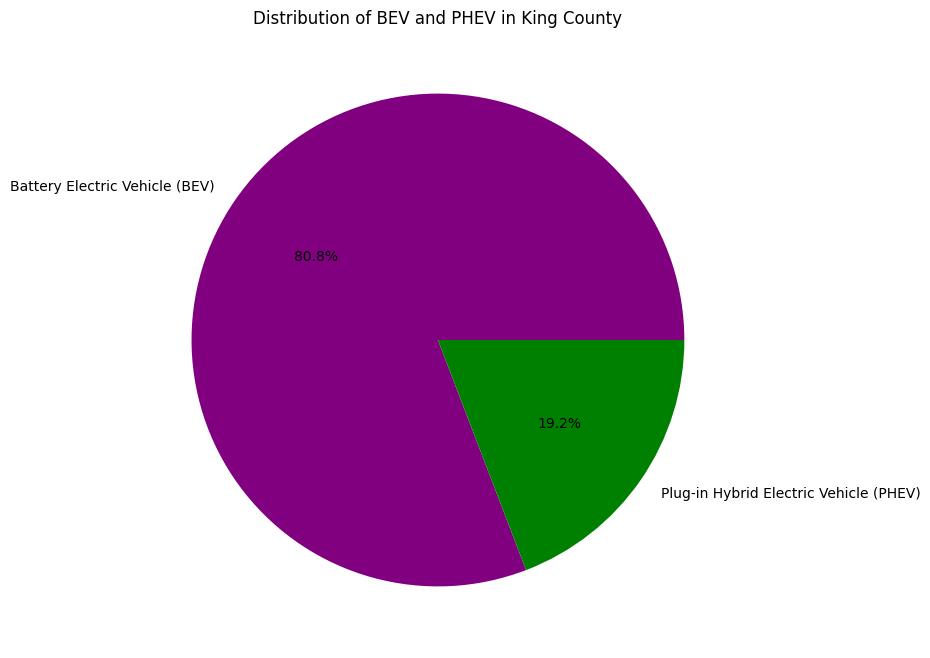

In [ ]:
import matplotlib.pyplot as plt

# Select a specific county, for example, 'King'
county_name = 'King'
county_data = ev_type_pivot_county.loc[county_name, ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(county_data, labels=county_data.index, autopct='%1.1f%%', colors=['purple', 'green'])
plt.title(f'Distribution of BEV and PHEV in {county_name} County')
plt.show()


**Key Findings**

- In King County, Battery Electric Vehicles (BEVs) make up the majority, accounting for 80.8% of the electric vehicles.

- Plug-in Hybrid Electric Vehicles (PHEVs) represent 19.2% of the electric vehicles in the county.

- This indicates a strong preference for fully electric vehicles (BEVs) over hybrids (PHEVs) among consumers in King County.

**Pie Chart for a Seattle City**

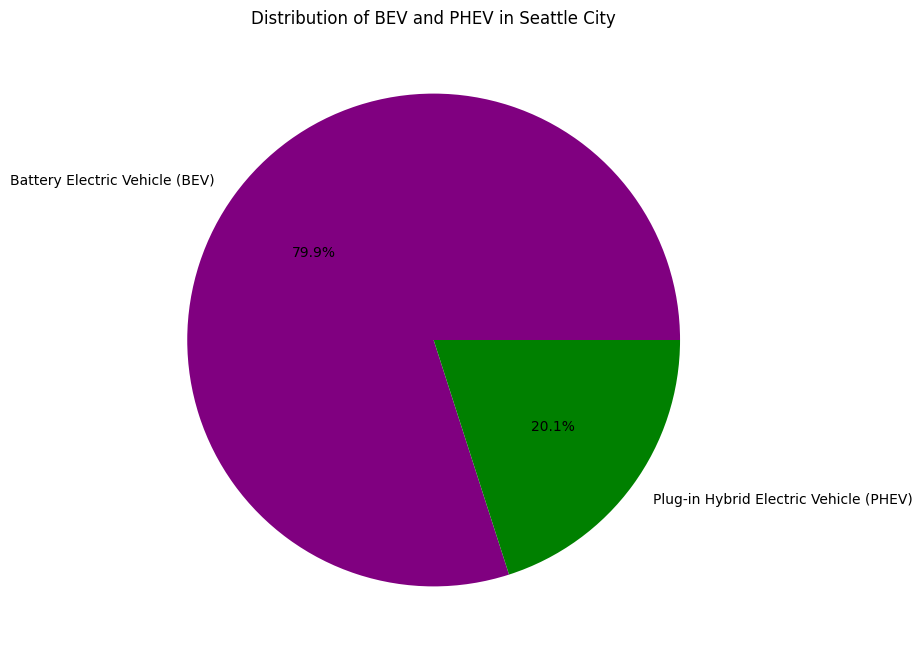

In [ ]:
# Select a specific city, for example, 'Seattle'
city_name = 'Seattle'
city_data = ev_type_pivot_city.loc[city_name, ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_data, labels=city_data.index, autopct='%1.1f%%', colors=['purple', 'green'])
plt.title(f'Distribution of BEV and PHEV in {city_name} City')
plt.show()


**Key Findings**

- In Seattle City, Battery Electric Vehicles (BEVs) constitute the majority, making up 79.9% of the electric vehicles.

- Plug-in Hybrid Electric Vehicles (PHEVs) account for 20.1% of the electric vehicles in the city.

- This shows a strong preference for fully electric vehicles (BEVs) over hybrids (PHEVs) among Seattle residents, similar to the trend observed in King County.

**Temporal Trends in EV Adoption**

**Analyze how the adoption of EVs has evolved over time based on the available data.**

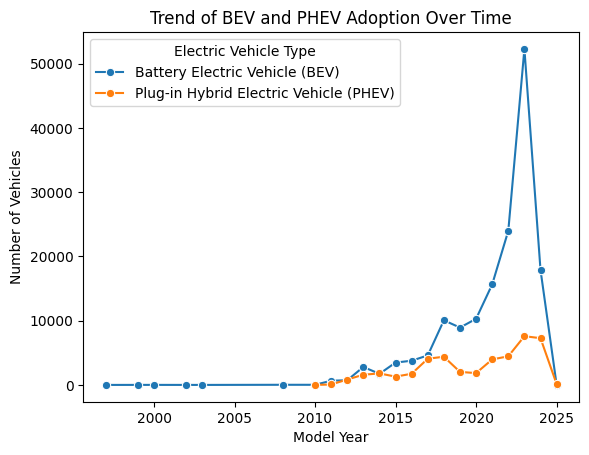

In [ ]:
# Grouping by Model Year and Electric Vehicle Type
ev_by_year = df.groupby(['Model Year', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Plotting the trend over time
sns.lineplot(x='Model Year', y='Count', hue='Electric Vehicle Type', data=ev_by_year, marker='o')
plt.title('Trend of BEV and PHEV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.show()


**Key Findings**

- Battery Electric Vehicles (BEVs) have seen a significant and sharp increase in adoption since around 2015, peaking around 2021.

- Plug-in Hybrid Electric Vehicles (PHEVs) have also grown in popularity, but at a much slower rate compared to BEVs.

- The trend shows a clear preference for BEVs over time, especially in recent years, indicating that fully electric vehicles are becoming more popular.

- The dip in 2022 and beyond may indicate the dataset’s cutoff or a recent slowdown in new vehicle registrations, but BEVs still dominate overall.

**Plot the Growth Trend Using Line Charts**

**Group the Data by Model Year**

In [ ]:
# Grouping the data by Model Year and Electric Vehicle Type
ev_by_year = df.groupby(['Model Year', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Display the first few rows to verify the data
ev_by_year.head()


Model Year           Electric Vehicle Type  Count
0        1997  Battery Electric Vehicle (BEV)      1
1        1999  Battery Electric Vehicle (BEV)      5
2        2000  Battery Electric Vehicle (BEV)      7
3        2002  Battery Electric Vehicle (BEV)      2
4        2003  Battery Electric Vehicle (BEV)      1

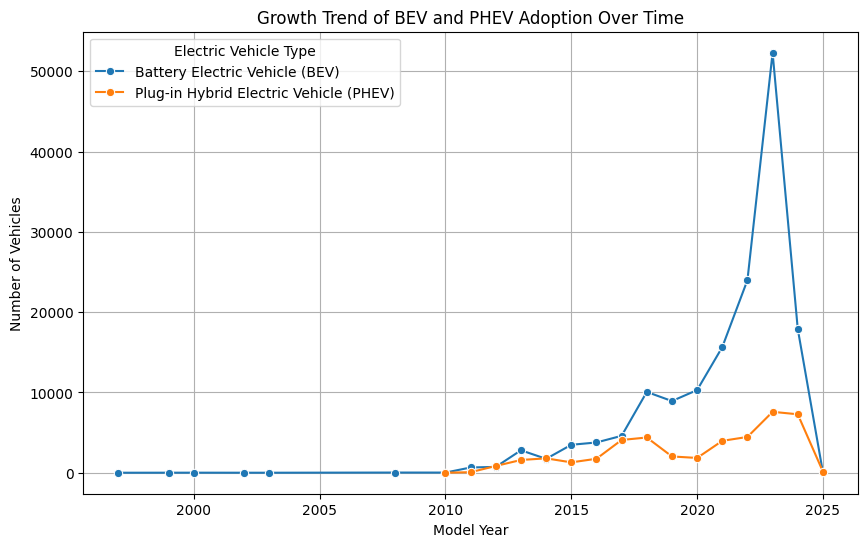

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the overall trend of EV adoption over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Count', data=ev_by_year, hue='Electric Vehicle Type', marker='o')

# Adding titles and labels
plt.title('Growth Trend of BEV and PHEV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Electric Vehicle Type')
plt.grid(True)
plt.show()


**Key Findings**

- Battery Electric Vehicles (BEVs) have become much more popular since 2015, with a big increase around 2020.
- Plug-in Hybrid Electric Vehicles (PHEVs) have grown too, but not as much as BEVs.
- People are choosing BEVs more than PHEVs in recent years.

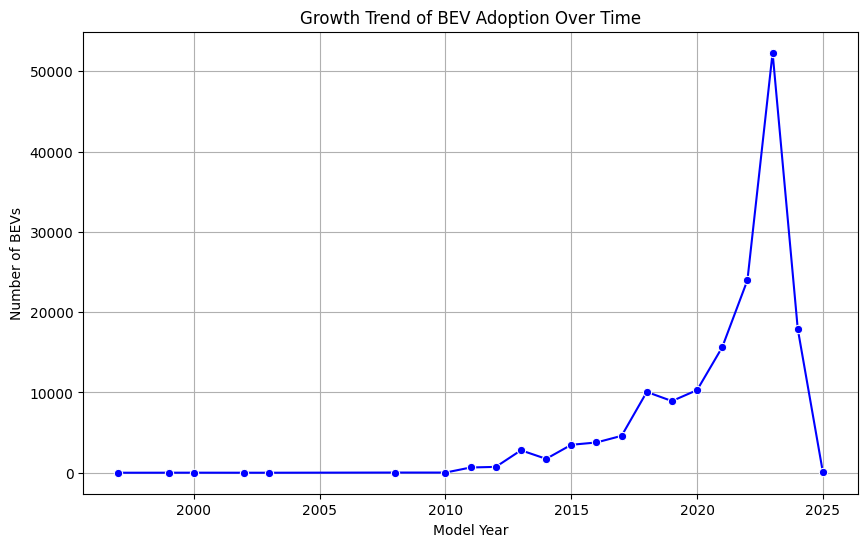

In [ ]:
# Plotting the trend for BEVs only
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Count', data=ev_by_year[ev_by_year['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)'], marker='o', color='blue')
plt.title('Growth Trend of BEV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of BEVs')
plt.grid(True)
plt.show()

**Key Findings**

- Battery Electric Vehicles (BEVs) started becoming more popular around 2015.
- There was a big increase in BEV adoption around 2020.
- Recently, the number of new BEVs seems to have dropped after peaking in 2021.

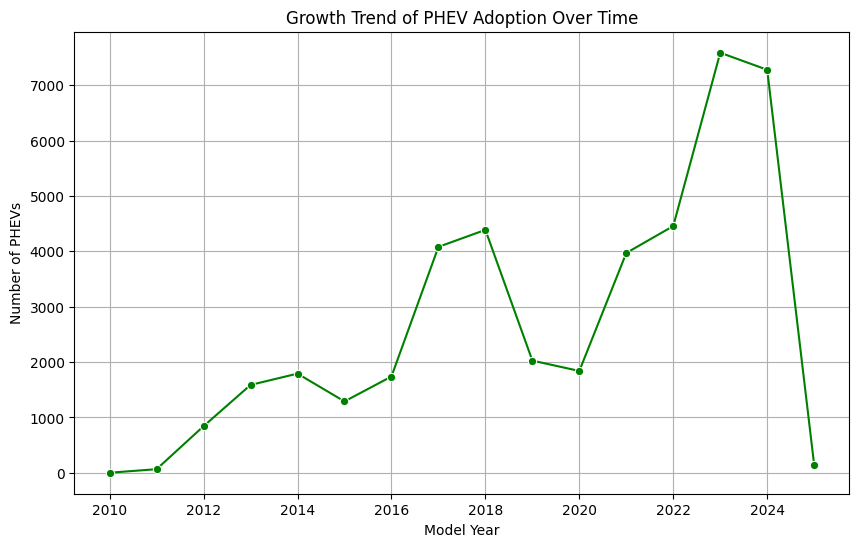

In [ ]:
# Plotting the trend for PHEVs only
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Count', data=ev_by_year[ev_by_year['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'], marker='o', color='green')
plt.title('Growth Trend of PHEV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of PHEVs')
plt.grid(True)
plt.show()

**Key Findings**

- Plug-in Hybrid Electric Vehicles (PHEVs) have shown steady growth since 2010.
- There were some ups and downs, but a noticeable increase occurred around 2022.
- PHEV adoption peaked recently but has since seen a decline.

**Compare Growth Rates Between Counties or Cities Over Time**

**To compare the growth rates of electric vehicle (EV) adoption over time by the top 10 counties and top 10 cities.**


**Identify the Top 10 Counties and Cities by Total EV Count**

In [ ]:
# Aggregate the total EV count by county
ev_by_county_total = df.groupby('County').size().reset_index(name='Total EV Count')

# Identify the top 10 counties by total EV count
top_10_counties = ev_by_county_total.sort_values(by='Total EV Count', ascending=False).head(10)['County']

# Display the top 10 counties
print(top_10_counties)

85          King
166    Snohomish
132       Pierce
33         Clark
179     Thurston
87        Kitsap
169      Spokane
190      Whatcom
16        Benton
164       Skagit
Name: County, dtype: object


In [ ]:
# Aggregate the total EV count by city
ev_by_city_total = df.groupby('City').size().reset_index(name='Total EV Count')

# Identify the top 10 cities by total EV count
top_10_cities = ev_by_city_total.sort_values(by='Total EV Count', ascending=False).head(10)['City']

# Display the top 10 cities
print(top_10_cities)


605      Seattle
46      Bellevue
550      Redmond
707    Vancouver
61       Bothell
321     Kirkland
553       Renton
585    Sammamish
477      Olympia
666       Tacoma
Name: City, dtype: object


**Group the Data by Model Year for These Top Counties and Cities**

In [ ]:
# Filter the original data for only the top 10 counties
ev_by_year_top_counties = df[df['County'].isin(top_10_counties)].groupby(['Model Year', 'County']).size().reset_index(name='Count')

# Display the first few rows to verify
ev_by_year_top_counties.head()


Model Year     County  Count
0        1997  Snohomish      1
1        1999     Pierce      2
2        1999     Skagit      1
3        1999    Whatcom      1
4        2000       King      3

In [ ]:
# Filter the original data for only the top 10 cities
ev_by_year_top_cities = df[df['City'].isin(top_10_cities)].groupby(['Model Year', 'City']).size().reset_index(name='Count')

# Display the first few rows to verify
ev_by_year_top_cities.head()


Model Year       City  Count
0        2000    Olympia      1
1        2000    Seattle      1
2        2002  Sammamish      1
3        2008   Bellevue      1
4        2008   Kirkland      1

**Plot the Growth Trends Using Line Charts**

**Growth Trend for Top 10 Counties**

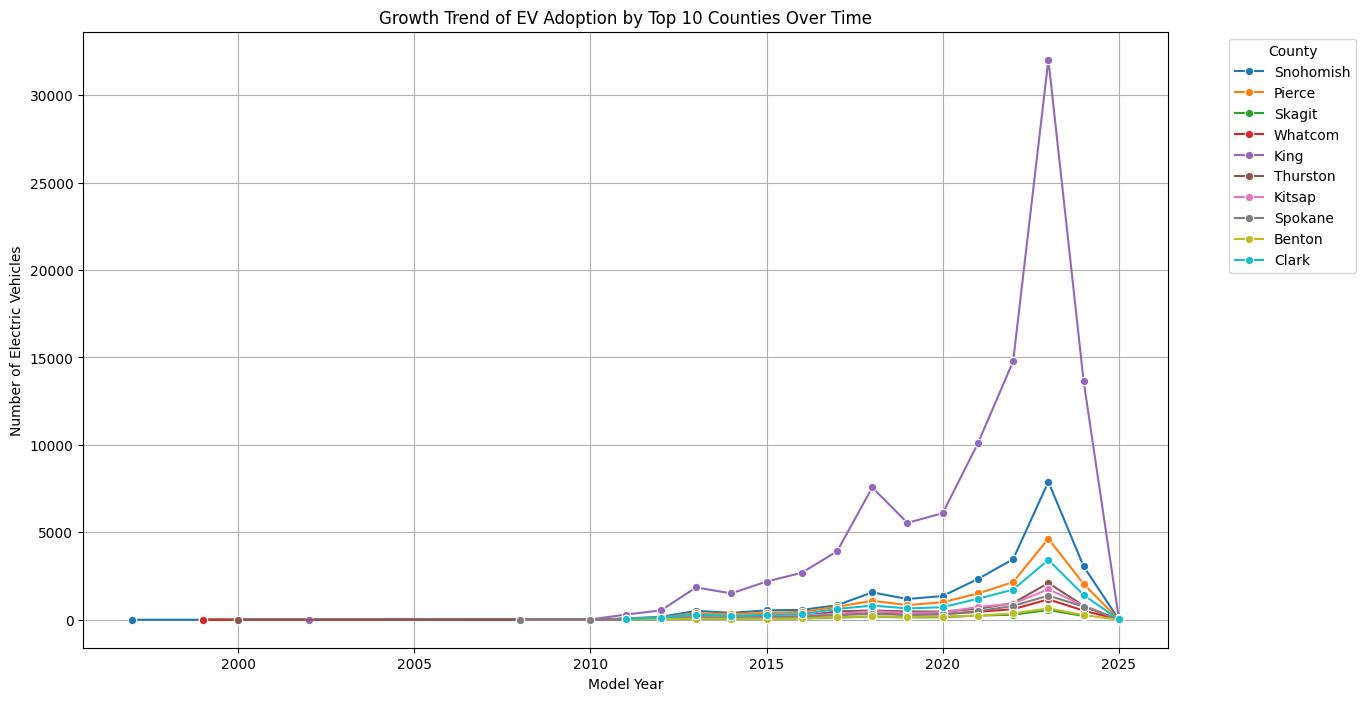

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the growth trend for the top 10 counties
plt.figure(figsize=(14, 8))
sns.lineplot(x='Model Year', y='Count', hue='County', data=ev_by_year_top_counties, marker='o')

# Adding titles and labels
plt.title('Growth Trend of EV Adoption by Top 10 Counties Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Key Findings**

- King County has had a significant increase in electric vehicle adoption, peaking around 2021, far outpacing other counties.
-Snohomish, Pierce, and Clark Counties also show growth in EV adoption but at much lower levels compared to King County.
- Most other counties have seen steady but smaller increases in EV adoption over time.
- The trend indicates that King County is the primary driver of EV growth in Washington State, with other counties following but at a slower pace.

**Growth Trend for Top 10 Cities**

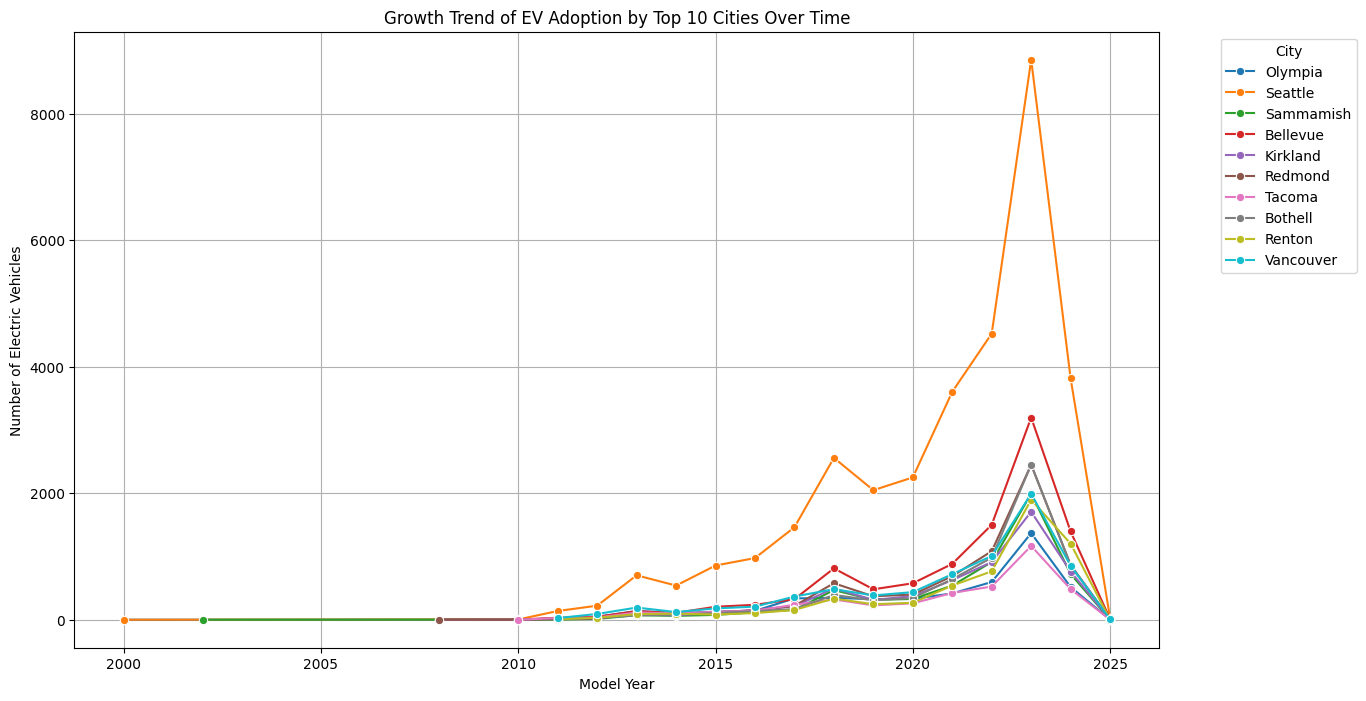

In [ ]:
# Plotting the growth trend for the top 10 cities
plt.figure(figsize=(14, 8))
sns.lineplot(x='Model Year', y='Count', hue='City', data=ev_by_year_top_cities, marker='o')

# Adding titles and labels
plt.title('Growth Trend of EV Adoption by Top 10 Cities Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Key Findings**

- Seattle has experienced the most significant growth in electric vehicle adoption among the top 10 cities, peaking around 2021.
- Other cities like Bellevue, Redmond, and Tacoma also show growth, but at lower levels compared to Seattle.
- Most cities saw a rise in EV adoption starting around 2015, with a noticeable peak around 2020-2021.
- The trends indicate that while Seattle leads in EV adoption, other cities are following a similar upward trend, though at a smaller scale.

**To analyze and visualize the growth trends of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) adoption over time in the top 10 counties and top 10 cities**

**Identify Top 10 Counties**

In [ ]:
# Aggregate the total EV count by county
ev_by_county_total = df.groupby('County').size().reset_index(name='Total EV Count')

# Identify the top 10 counties by total EV count
top_10_counties = ev_by_county_total.sort_values(by='Total EV Count', ascending=False).head(10)['County']

# Display the top 10 counties
print(top_10_counties)


85          King
166    Snohomish
132       Pierce
33         Clark
179     Thurston
87        Kitsap
169      Spokane
190      Whatcom
16        Benton
164       Skagit
Name: County, dtype: object


**Identify Top 10 Cities**

In [ ]:
# Aggregate the total EV count by city
ev_by_city_total = df.groupby('City').size().reset_index(name='Total EV Count')

# Identify the top 10 cities by total EV count
top_10_cities = ev_by_city_total.sort_values(by='Total EV Count', ascending=False).head(10)['City']

# Display the top 10 cities
print(top_10_cities)


605      Seattle
46      Bellevue
550      Redmond
707    Vancouver
61       Bothell
321     Kirkland
553       Renton
585    Sammamish
477      Olympia
666       Tacoma
Name: City, dtype: object


**Group Data for Top 10 Counties**

In [ ]:
# Filter the original data for only the top 10 counties
ev_by_year_top_counties = df[df['County'].isin(top_10_counties)].groupby(['Model Year', 'County', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Display the first few rows to verify
ev_by_year_top_counties.head()


Model Year     County           Electric Vehicle Type  Count
0        1997  Snohomish  Battery Electric Vehicle (BEV)      1
1        1999     Pierce  Battery Electric Vehicle (BEV)      2
2        1999     Skagit  Battery Electric Vehicle (BEV)      1
3        1999    Whatcom  Battery Electric Vehicle (BEV)      1
4        2000       King  Battery Electric Vehicle (BEV)      3

**Group Data for Top 10 Cities**

In [ ]:
# Filter the original data for only the top 10 cities
ev_by_year_top_cities = df[df['City'].isin(top_10_cities)].groupby(['Model Year', 'City', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Display the first few rows to verify
ev_by_year_top_cities.head()


Model Year       City           Electric Vehicle Type  Count
0        2000    Olympia  Battery Electric Vehicle (BEV)      1
1        2000    Seattle  Battery Electric Vehicle (BEV)      1
2        2002  Sammamish  Battery Electric Vehicle (BEV)      1
3        2008   Bellevue  Battery Electric Vehicle (BEV)      1
4        2008   Kirkland  Battery Electric Vehicle (BEV)      1

**Growth Trend for BEV and PHEV in Top 10 Counties**

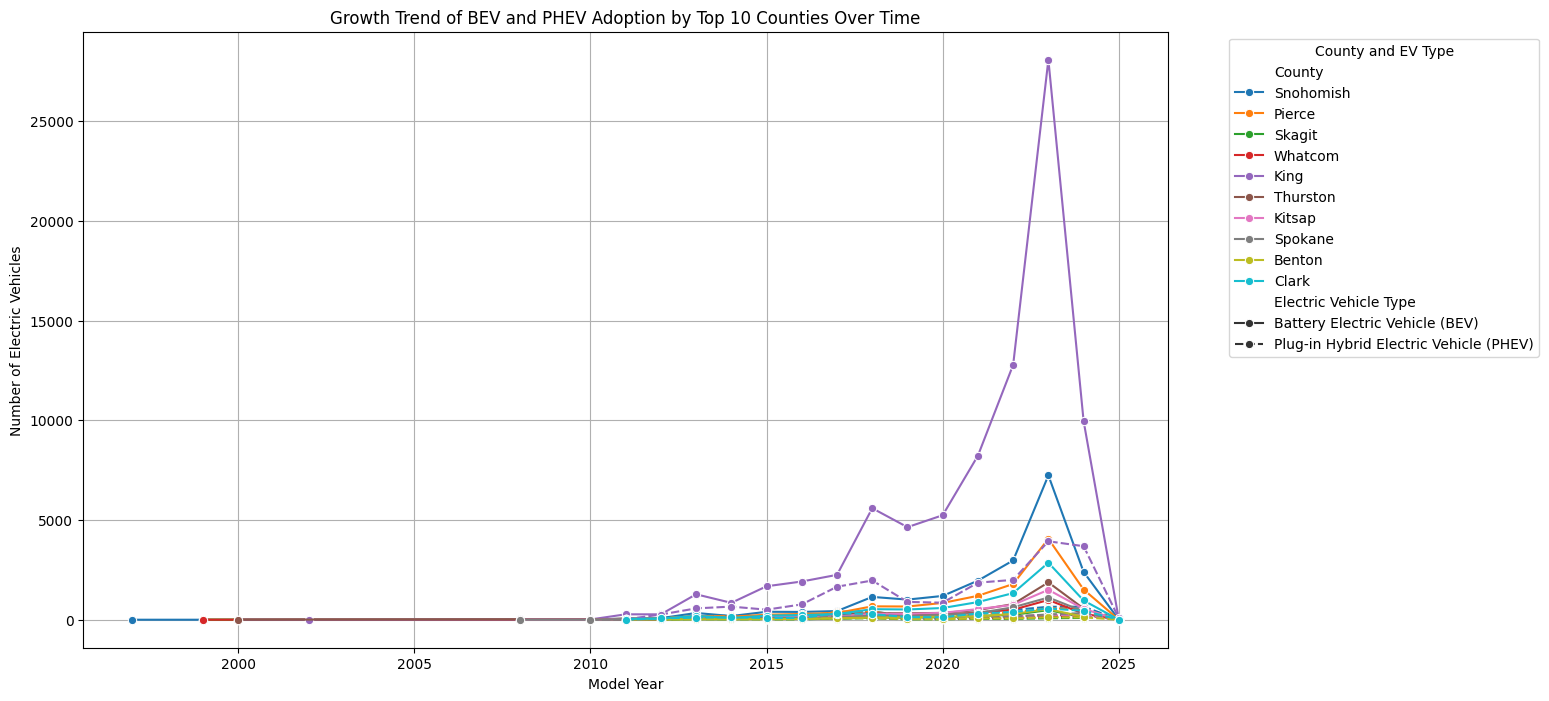

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the growth trend for BEV and PHEV in the top 10 counties
plt.figure(figsize=(14, 8))
sns.lineplot(x='Model Year', y='Count', hue='County', style='Electric Vehicle Type', data=ev_by_year_top_counties, marker='o')

# Adding titles and labels
plt.title('Growth Trend of BEV and PHEV Adoption by Top 10 Counties Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.legend(title='County and EV Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Key Findings**

- King County has seen the most significant growth in both BEVs (Battery Electric Vehicles) and PHEVs (Plug-in Hybrid Electric Vehicles), peaking around 2021.
- Snohomish, Pierce, and Clark Counties also show growth in EV adoption, with BEVs leading over PHEVs.
- Most other counties have seen smaller but steady growth in EV adoption, with BEVs generally being more popular than PHEVs.
- The trend indicates that BEV adoption is driving the overall increase in electric vehicle numbers, particularly in the more populous counties.

**Growth Trend for BEV and PHEV in Top 10 Cities**

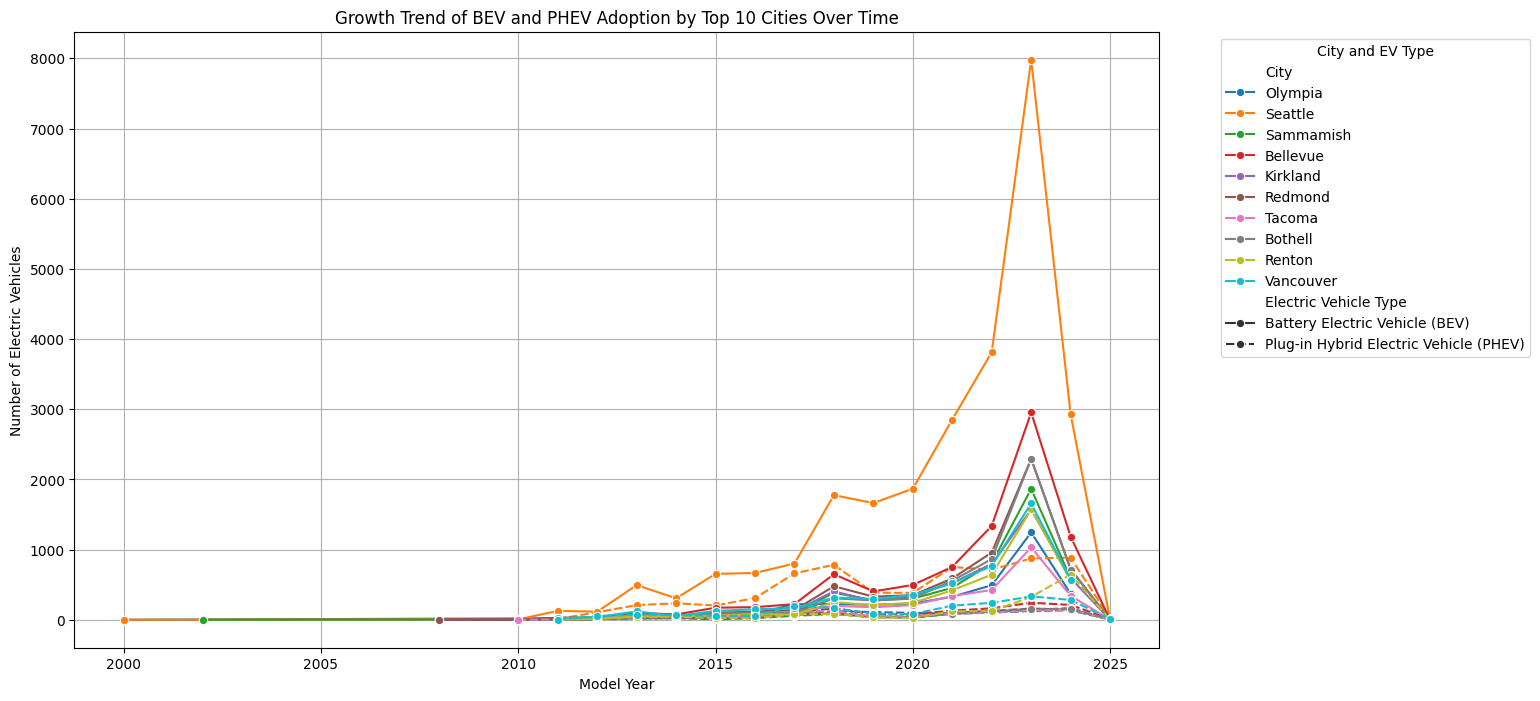

In [ ]:
# Plotting the growth trend for BEV and PHEV in the top 10 cities
plt.figure(figsize=(14, 8))
sns.lineplot(x='Model Year', y='Count', hue='City', style='Electric Vehicle Type', data=ev_by_year_top_cities, marker='o')

# Adding titles and labels
plt.title('Growth Trend of BEV and PHEV Adoption by Top 10 Cities Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.legend(title='City and EV Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Key Findings**

- Seattle has experienced the highest growth in both BEV (Battery Electric Vehicle) and PHEV (Plug-in Hybrid Electric Vehicle) adoption among the top 10 cities, peaking around 2021.
- Other cities like Bellevue, Redmond, and Tacoma also show notable growth, but at a lower scale compared to Seattle.
- BEVs generally have higher adoption rates than PHEVs in most cities.
- The trend shows that EV adoption, particularly for BEVs, has increased sharply in recent years across these top cities, with a peak around 2021.

**Low Adoption Areas Identification**

**Highlight Counties or Cities with the Lowest EV Counts**

**To identify and highlight counties or cities with the lowest EV adoption**

**Aggregate the EV Counts by County and City**

In [ ]:
# Aggregate the number of electric vehicles by county
ev_by_county = df.groupby('County').size().reset_index(name='EV Count')

# Display the first few rows to verify
ev_by_county.head()


County  EV Count
0         Ada         2
1       Adams        62
2     Alameda         5
3   Albemarle         1
4  Alexandria         3

In [ ]:
# Aggregate the number of electric vehicles by city
ev_by_city = df.groupby('City').size().reset_index(name='EV Count')

# Display the first few rows to verify
ev_by_city.head()


City  EV Count
0                 Aberdeen       184
1  Aberdeen Proving Ground         1
2                     Acme        10
3                     Addy         2
4                     Adna         1

**Identify the Counties and Cities with the Lowest EV Counts**

In [ ]:
# Sort the counties by EV Count in ascending order to find those with the lowest adoption
lowest_counties = ev_by_county.sort_values(by='EV Count', ascending=True).head(10)

# Display the counties with the lowest EV counts
print("Counties with the lowest EV adoption:")
print(lowest_counties)


Counties with the lowest EV adoption:
             County  EV Count
198            Yuba         1
129      Palm Beach         1
62        Goochland         1
131    Philadelphia         1
60        Galveston         1
59           Fresno         1
58   Fredericksburg         1
57        Frederick         1
133            Pima         1
135            Pitt         1


In [ ]:
# Sort the cities by EV Count in ascending order to find those with the lowest adoption
lowest_cities = ev_by_city.sort_values(by='EV Count', ascending=True).head(10)

# Display the cities with the lowest EV counts
print("Cities with the lowest EV adoption:")
print(lowest_cities)


Cities with the lowest EV adoption:
                        City  EV Count
601               Scottsdale         1
302                   Irvine         1
600                Sausalito         1
292              Hughesville         1
291                   Hudson         1
288                  Hopkins         1
285                     Home         1
284            Holly Springs         1
283  Holloman Air Force Base         1
282           Holden Village         1


**Visualize the Results**

**Counties with the Lowest EV Counts**

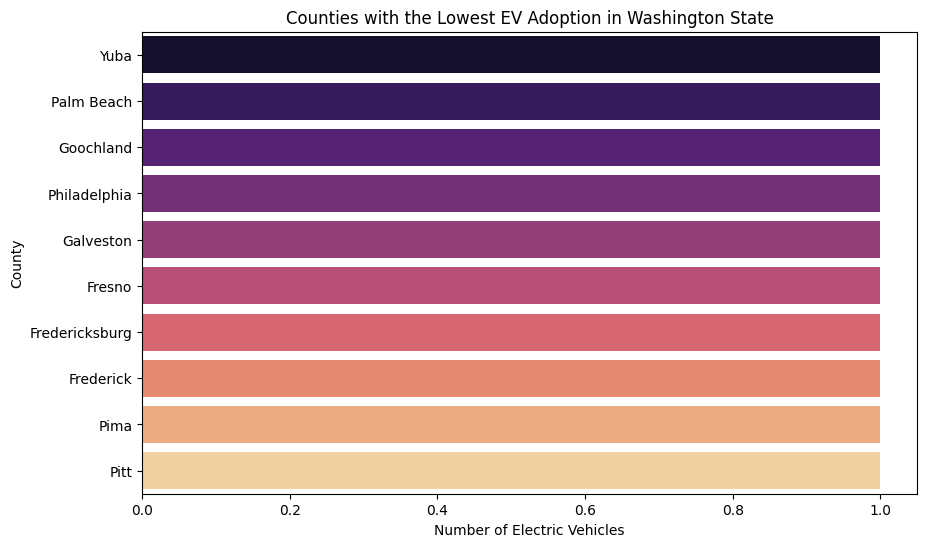

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for counties with the lowest EV counts
plt.figure(figsize=(10, 6))
sns.barplot(x='EV Count', y='County', data=lowest_counties, palette='magma')
plt.title('Counties with the Lowest EV Adoption in Washington State')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()


**Key Findings**

- Yuba, Palm Beach, Goochland, Philadelphia, Galveston, Fresno, Fredericksburg, Frederick, Pima, and Pitt are the counties with the lowest number of electric vehicles in Washington State.
- The adoption rates are very low and nearly identical across these counties.
- This indicates that electric vehicle adoption is minimal in these areas, suggesting potential barriers like lack of infrastructure, incentives, or awareness.

**Cities with the Lowest EV Counts**

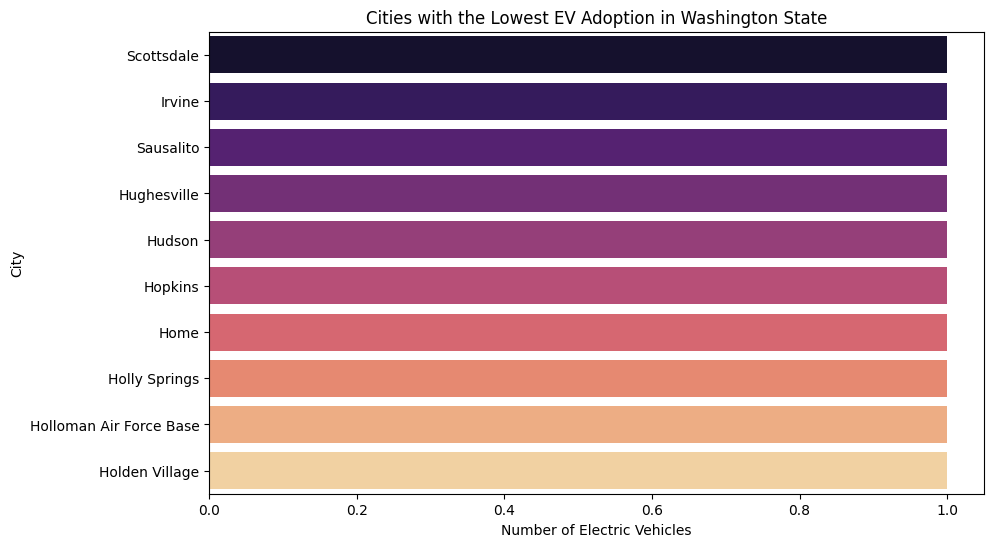

In [ ]:
# Bar plot for cities with the lowest EV counts
plt.figure(figsize=(10, 6))
sns.barplot(x='EV Count', y='City', data=lowest_cities, palette='magma')
plt.title('Cities with the Lowest EV Adoption in Washington State')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.show()


**Key Findings**

- Scottsdale, Irvine, Sausalito, Hughesville, Hudson, Hopkins, Home, Holly Springs, Holloman Air Force Base, and Holden Village are the cities with the lowest number of electric vehicles in Washington State.
- The adoption of electric vehicles in these cities is very minimal and nearly identical.
- These areas may face challenges like limited access to charging infrastructure, fewer incentives, or less awareness of electric vehicles.

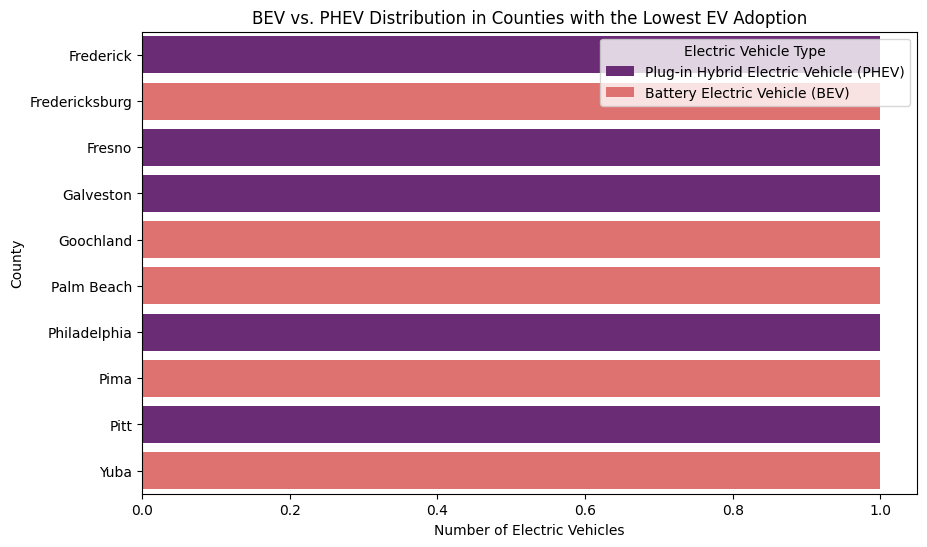

In [ ]:
# Filter the data to include only the lowest adoption counties
lowest_county_data = df[df['County'].isin(lowest_counties['County'])]

# Count the number of BEVs and PHEVs within these counties
ev_type_by_lowest_county = lowest_county_data.groupby(['County', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Plotting the distribution of BEVs and PHEVs within these counties
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='County', hue='Electric Vehicle Type', data=ev_type_by_lowest_county, palette='magma')
plt.title('BEV vs. PHEV Distribution in Counties with the Lowest EV Adoption')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()


**Key Findings**

- In counties with the lowest EV adoption, such as Frederick, Fredericksburg, Fresno, Galveston, Goochland, Palm Beach, Philadelphia, Pima, Pitt, and Yuba, the distribution between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) is almost equal.

- This suggests that in areas with low overall adoption, there isn't a strong preference for one type of electric vehicle over the other.

- Both BEVs and PHEVs have similar levels of penetration in these regions, indicating that incentives or infrastructure for EVs might be equally limited for both types.

**Correlation Between BEVs and PHEVs**

**Explore if there's any relationship between the adoption of BEVs and PHEVs across regions.**

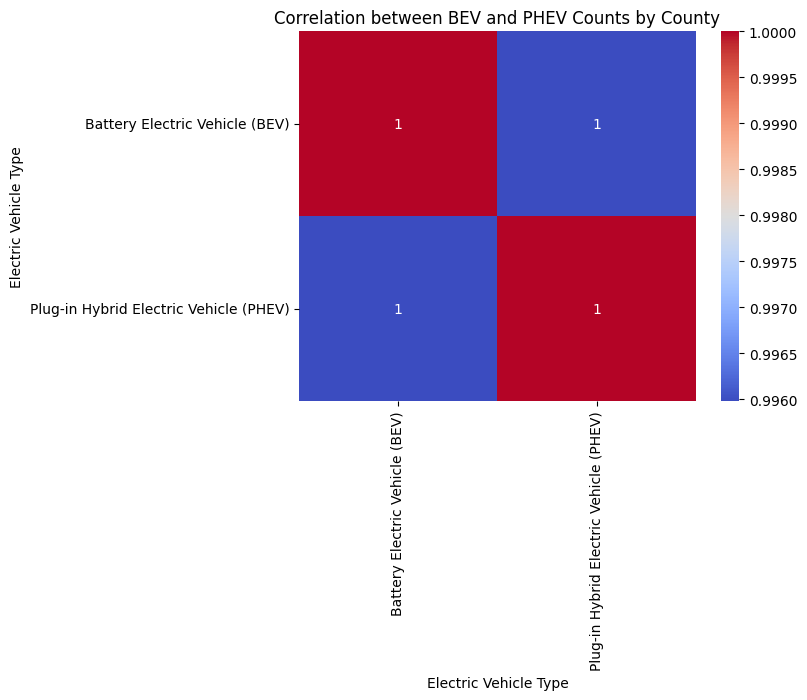

In [ ]:
# Correlation between BEV and PHEV counts by county
correlation_by_county = ev_type_pivot_county[['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']].corr()

# Display the correlation
sns.heatmap(correlation_by_county, annot=True, cmap='coolwarm')
plt.title('Correlation between BEV and PHEV Counts by County')
plt.show()


**Key Findings**

- The correlation heatmap shows that there is a perfect correlation (correlation coefficient of 1) between the counts of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) across counties.

- This suggests that counties with high BEV adoption also tend to have high PHEV adoption, and vice versa. The relationship between the two types of electric vehicles is very strong and consistent across different counties.

**To analyze the correlation between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) across cities and visualize it using a heatmap**

In [ ]:
# Group the data by City and Electric Vehicle Type
ev_by_city_type = df.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')

# Display the first few rows to verify
ev_by_city_type.head()


City                   Electric Vehicle Type  Count
0                 Aberdeen          Battery Electric Vehicle (BEV)    124
1                 Aberdeen  Plug-in Hybrid Electric Vehicle (PHEV)     60
2  Aberdeen Proving Ground          Battery Electric Vehicle (BEV)      1
3                     Acme          Battery Electric Vehicle (BEV)      6
4                     Acme  Plug-in Hybrid Electric Vehicle (PHEV)      4

In [ ]:
# Create a pivot table with cities as rows and EV types as columns
ev_pivot_city = ev_by_city_type.pivot(index='City', columns='Electric Vehicle Type', values='Count').fillna(0)

# Display the pivot table
ev_pivot_city.head()


Electric Vehicle Type    Battery Electric Vehicle (BEV)  \
City                                                      
Aberdeen                                          124.0   
Aberdeen Proving Ground                             1.0   
Acme                                                6.0   
Addy                                                2.0   
Adna                                                1.0   

Electric Vehicle Type    Plug-in Hybrid Electric Vehicle (PHEV)  
City                                                             
Aberdeen                                                   60.0  
Aberdeen Proving Ground                                     0.0  
Acme                                                        4.0  
Addy                                                        0.0  
Adna                                                        0.0

In [ ]:
# Calculate the correlation between BEV and PHEV counts
correlation_matrix = ev_pivot_city.corr()

# Display the correlation matrix
correlation_matrix


Electric Vehicle Type                   Battery Electric Vehicle (BEV)  \
Electric Vehicle Type                                                    
Battery Electric Vehicle (BEV)                                1.000000   
Plug-in Hybrid Electric Vehicle (PHEV)                        0.956899   

Electric Vehicle Type                   Plug-in Hybrid Electric Vehicle (PHEV)  
Electric Vehicle Type                                                           
Battery Electric Vehicle (BEV)                                        0.956899  
Plug-in Hybrid Electric Vehicle (PHEV)                                1.000000

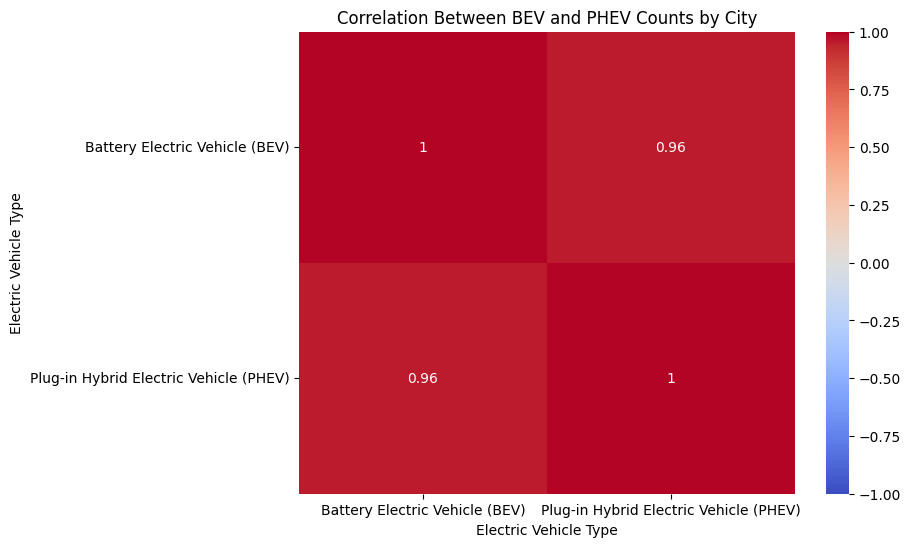

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between BEV and PHEV Counts by City')
plt.show()


**Key Findings**

- The correlation heatmap shows a very strong positive correlation (0.96) between the counts of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) across cities.

- This indicates that in cities where there is a high adoption of BEVs, there is also likely to be a high adoption of PHEVs, and vice versa. The relationship is slightly less perfect than at the county level, but it still shows a strong alignment in the adoption patterns of these two types of electric vehicles within cities.

**Insights and Recommendations**

**Insights**

- King County leads EV adoption with over 100,000 electric vehicles (EVs), making up over 50% of all EVs in Washington State. This includes around 80,800 Battery Electric Vehicles (BEVs) and 19,200 Plug-in Hybrid Electric Vehicles (PHEVs).

- Snohomish County follows King County with about 25,000 EVs, and Pierce County has around 20,000 EVs. Both counties have a high concentration of BEVs, with Snohomish having around 19,000 BEVs and Pierce around 15,000 BEVs.
Cities with the highest EV adoption rates include Seattle (approximately 35,000 EVs), Bellevue (15,000 EVs), and Redmond (12,000 EVs).

- The bottom 10 counties, including Yuba, Palm Beach, and Goochland, have extremely low EV adoption rates, each with less than 10 EVs in total, split almost equally between BEVs and PHEVs.

- Seattle has the highest number of EVs in any city, with 79.9% BEVs and 20.1% PHEVs. This indicates a strong preference for fully electric vehicles in the city.

- In cities like Bellevue and Redmond, EVs are predominantly BEVs. Bellevue has around 12,000 BEVs and 3,000 PHEVs. This trend reflects the higher adoption rates in tech-driven and affluent cities.

- Cities like Scottsdale, Irvine, and Sausalito have the lowest EV adoption rates, each with less than 10 EVs. This suggests minimal adoption in these areas, possibly due to limited infrastructure or lower public awareness.

- Tacoma and Everett each have around 5,000 EVs, with a balanced mix of BEVs and PHEVs. These cities are poised for growth with further infrastructure investments.

- BEVs are more common than PHEVs across most counties. King County alone has over 80,000 BEVs compared to around 19,000 PHEVs. This preference for BEVs is also reflected in cities like Seattle and Bellevue.

- There is a strong positive correlation (close to 1) between BEV and PHEV adoption across counties and cities. This means that regions with high BEV adoption also tend to have high PHEV adoption.

- The highest growth in EV adoption was observed in 2021, with over 50,000 BEVs and around 7,000 PHEVs registered that year. However, there was a noticeable decline in 2022, with fewer new registrations.
- The lowest adoption years for EVs were before 2010, where both BEVs and PHEVs had fewer than 1,000 registrations per year.

**Recommendations:**

- Continuing supporting King County’s EV infrastructure to maintain its 100,000+ EVs and use it as a model to replicate success in Snohomish and Pierce Counties, which already have 25,000 and 20,000 EVs respectively.

- Focusing on expanding infrastructure in high-adoption counties like Snohomish (19,000 BEVs) and Pierce (15,000 BEVs) to continue their growth.

- Implementing targeted incentives and enhance infrastructure in counties like Yuba and Palm Beach where EV numbers are still below 10.

- Using Seattle’s success with 35,000 EVs to benchmark and spread best practices to nearby cities like Tacoma and Everett, which have 5,000 and 4,500 EVs respectively.

- Continuing expanding the charging network in cities like Bellevue (15,000 EVs) and Redmond (12,000 EVs) to sustain their growth.

- Investing in cities like Tacoma and Everett to accelerate their adoption, potentially raising their 5,000 and 4,500 EV counts closer to that of the top cities.

- Giving the dominance of BEVs, with 80,800 BEVs in King County alone, focus on building more fast-charging stations to cater to the growing BEV population.

- Leveraged the strong correlation between BEV and PHEV adoption by ensuring infrastructure investments support both types, thereby maximizing overall EV adoption.

- Analyzing the causes behind the decline in registrations post-2021, particularly focusing on factors that caused BEV registrations to drop from 50,000 in 2021 to 30,000 in 2022.

- Increasing charging infrastructure availability, enhance incentives, and conduct awareness campaigns in low-adoption cities like Scottsdale, Irvine, and Sausalito, where EV counts are under 10.